In [ ]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/GnarlyJointGenotypingPart2/e85b3176-ca73-4b3d-880e-44d1dc9b629f/call-GatherVariantCallingMetrics/dfci-ufc-chr22.variant_calling_detail_metrics .

In [ ]:
import pandas as pd

In [ ]:
# File path
file_path = "dfci-ufc-chr22.variant_calling_detail_metrics"

# Read the file, filter out lines that start with '#', and store the remaining lines in a list
filtered_lines = []
with open(file_path, 'r') as file:
    for line in file:
        if not line.startswith('#'):
            filtered_lines.append(line)

# Join the filtered lines into a single string with newlines
filtered_content = ''.join(filtered_lines)

# Read the filtered content into a pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(filtered_content), sep='\t')

df.head(10)

In [ ]:
meta_data_df = pd.read_csv("/home/jupyter/ufc_qc/dfci-ufc.post_qc.all.tsv",sep='\t')
meta_data_df.head()

In [ ]:
# Merge the df and meta_data_df on the SAMPLE_ALIAS column from df and original_id column from meta_data_df
merged_df = pd.merge(df, meta_data_df[['original_id', 'cohort', 'inferred_sex', 'intake_qc_pop']],
                     left_on='SAMPLE_ALIAS', right_on='original_id', how='left')

# Drop the original_id column after the merge
merged_df.drop(columns=['original_id'], inplace=True)
merged_df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import robust

# Plotting TOTAL_SNPs vs Cohort, Sex, and Ancestry

In [ ]:
# Create the violin plot for TOTAL_SNPS
plt.figure(figsize=(10, 6))
sns.violinplot(x='inferred_sex', y='TOTAL_SNPS', data=merged_df)
plt.title('Violin Plot of TOTAL_SNPS by Sex')
plt.show()

# Calculate median and MAD for each cohort
summary_stats = merged_df.groupby('inferred_sex')['TOTAL_SNPS'].agg(['median', robust.mad])
print(summary_stats)

In [ ]:
# Create the violin plot for TOTAL_SNPS
plt.figure(figsize=(10, 6))
sns.violinplot(x='intake_qc_pop', y='TOTAL_SNPS', data=merged_df)
plt.title('Violin Plot of TOTAL_SNPS by Ancestry')
plt.show()

# Calculate median and MAD for each cohort
summary_stats = merged_df.groupby('intake_qc_pop')['TOTAL_SNPS'].agg(['median', robust.mad])
print(summary_stats)

In [ ]:
# Create the violin plot for TOTAL_SNPS
plt.figure(figsize=(10, 6))
sns.violinplot(x='cohort', y='TOTAL_SNPS', data=merged_df)
plt.title('Violin Plot of TOTAL_SNPS by Cohort')
plt.show()

# Calculate median and MAD for each cohort
summary_stats = merged_df.groupby('cohort')['TOTAL_SNPS'].agg(['median', robust.mad])
print(summary_stats)

# Plotting Total INDELS

In [ ]:
# Create the violin plot for TOTAL_INDELS
plt.figure(figsize=(10, 6))
sns.violinplot(x='cohort', y='TOTAL_INDELS', data=merged_df)
plt.title('Violin Plot of TOTAL_INDELS by Cohort')
plt.show()

# Calculate median and MAD for each cohort
summary_stats = merged_df.groupby('cohort')['TOTAL_INDELS'].agg(['median', robust.mad])
print(summary_stats)

In [ ]:
# Create the violin plot for TOTAL_INDELS
plt.figure(figsize=(10, 6))
sns.violinplot(x='intake_qc_pop', y='TOTAL_INDELS', data=merged_df)
plt.title('Violin Plot of TOTAL_INDELS by Cohort')
plt.show()

# Calculate median and MAD for each cohort
summary_stats = merged_df.groupby('intake_qc_pop')['TOTAL_INDELS'].agg(['median', robust.mad])
print(summary_stats)

In [ ]:
# Create the violin plot for TOTAL_INDELS
plt.figure(figsize=(10, 6))
sns.violinplot(x='inferred_sex', y='TOTAL_INDELS', data=merged_df)
plt.title('Violin Plot of TOTAL_INDELS by Cohort')
plt.show()

# Calculate median and MAD for each cohort
summary_stats = merged_df.groupby('inferred_sex')['TOTAL_INDELS'].agg(['median', robust.mad])
print(summary_stats)

# Ti/Tv stratified by Cohort, Sex, Ancestry

In [ ]:
# Create the violin plot for DBSNP_TITV
plt.figure(figsize=(10, 6))
sns.violinplot(x='cohort', y='DBSNP_TITV', data=merged_df)
plt.title('Violin Plot of DBSNP_TITV by Cohort')
plt.show()

# Calculate median and MAD for each cohort
summary_stats = merged_df.groupby('cohort')['DBSNP_TITV'].agg(['median', robust.mad])
print(summary_stats)

In [ ]:
# Create the violin plot for DBSNP_TITV
plt.figure(figsize=(10, 6))
sns.violinplot(x='inferred_sex', y='DBSNP_TITV', data=merged_df)
plt.title('Violin Plot of DBSNP_TITV by Sex')
plt.show()

# Calculate median and MAD for each cohort
summary_stats = merged_df.groupby('inferred_sex')['DBSNP_TITV'].agg(['median', robust.mad])
print(summary_stats)

In [ ]:
# Create the violin plot for DBSNP_TITV
plt.figure(figsize=(10, 6))
sns.violinplot(x='intake_qc_pop', y='DBSNP_TITV', data=merged_df)
plt.title('Violin Plot of DBSNP_TITV by Ancestry')
plt.show()

# Calculate median and MAD for each cohort
summary_stats = merged_df.groupby('intake_qc_pop')['DBSNP_TITV'].agg(['median', robust.mad])
print(summary_stats)

# Analyze Allele Frequencies for UFC vs AoU

In [ ]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Extract_AF/68a762ce-1741-4624-a3a8-72bfe9b22a17/call-concatenateReferenceAF/gnomad_chr22.tsv .
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Extract_AF/c6270529-9c0c-43f7-ae13-f4d67b2b8b5b/call-concatenateStudyAF/cacheCopy/ufc_chr22.tsv .

In [ ]:
import pandas as pd

# Load the files into dataframes
aou_df = pd.read_csv('gnomad_chr22.tsv', sep='\t', header=None, names=['chromosome', 'position', 'reference_allele', 'alternate_allele', 'AoU_AF'], index_col=False)
aou_df['AoU_AF'] = pd.to_numeric(aou_df['AoU_AF'], errors='coerce')

ufc_df = pd.read_csv('UFC_chr22.tsv', sep='\t', header=None, names=['chromosome', 'position','snp_id', 'reference_allele', 'alternate_allele', 'UFC_AF'], index_col=False)

# Perform a left join to include all rows from UFC and matching rows from AoU
merged_df = pd.merge(ufc_df, aou_df, on=['chromosome', 'position', 'reference_allele', 'alternate_allele'], how='outer', suffixes=('_UFC', '_AoU'))

# Replace NaN values in AoU_AF with 0
merged_df['AoU_AF'].fillna(0, inplace=True)

# Replace NaN values in AoU_AF with 0
merged_df['UFC_AF'].fillna(0, inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged allele frequencies data
# df = pd.read_csv('merged_allele_frequencies.tsv', sep='\t')

# Define a function to calculate R²
def calculate_r2(df):
    return df['UFC_AF'].corr(df['AoU_AF']) ** 2

# Bootstrap resampling to calculate confidence interval for R²
n_bootstraps = 10
bootstrap_r2_values = []

for _ in range(n_bootstraps):
    bootstrap_sample = merged_df.sample(frac=1, replace=True)
    bootstrap_r2_values.append(calculate_r2(bootstrap_sample))

bootstrap_r2_values = np.array(bootstrap_r2_values)
r2_ci_lower = np.percentile(bootstrap_r2_values, 2.5)
r2_ci_upper = np.percentile(bootstrap_r2_values, 97.5)

# Plot the scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UFC_AF', y='AoU_AF', data=merged_df, alpha=0.5)

# Add labels and title
plt.xlabel('UFC_AF')
plt.ylabel('gnomad_AF')
plt.title('Allele Frequencies Comparison')

# Calculate R² value for the original data
r2 = calculate_r2(merged_df)

# Display the R² value and its confidence interval on the plot
plt.text(merged_df['UFC_AF'].min(), merged_df['AoU_AF'].max(), 
         f'R² = {r2:.2f}\n95% CI: [{r2_ci_lower:.2f}, {r2_ci_upper:.2f}]', 
         fontsize=12, verticalalignment='top')

# Show the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
#incorporate ancestry 

# Hardy Weinberg Equilibrium

In [31]:
!gsutil cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Extract_AF/35e759a8-1f41-45c4-a42d-a97bdf33a7be/call-concatenateStudyHWE/cacheCopy/ufc_chr22.tsv ufc_chr22.hwe.tsv
!gsutil cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Extract_AF/a1df8da9-6802-4213-b284-0f8ec545d697/call-concatenateReferenceHWE/gnomad_chr22.tsv .

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Extract_AF/35e759a8-1f41-45c4-a42d-a97bdf33a7be/call-concatenateStudyHWE/cacheCopy/ufc_chr22.tsv...
- [1 files][153.3 MiB/153.3 MiB]                                                
Operation completed over 1 objects/153.3 MiB.                                    
Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Extract_AF/a1df8da9-6802-4213-b284-0f8ec545d697/call-concatenateReferenceHWE/gnomad_chr22.tsv...
/ [1 files][660.8 MiB/660.8 MiB]   27.7 MiB/s                                   
Operation completed over 1 objects/660.8 MiB.                                    


## Hardy Weinberg on All Snps (no filter for >1% freq)

/tmp/ipykernel_970/3152259658.py:13: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  gnomad_df = pd.read_csv(gnomad_file_path, sep='\t', header=None)


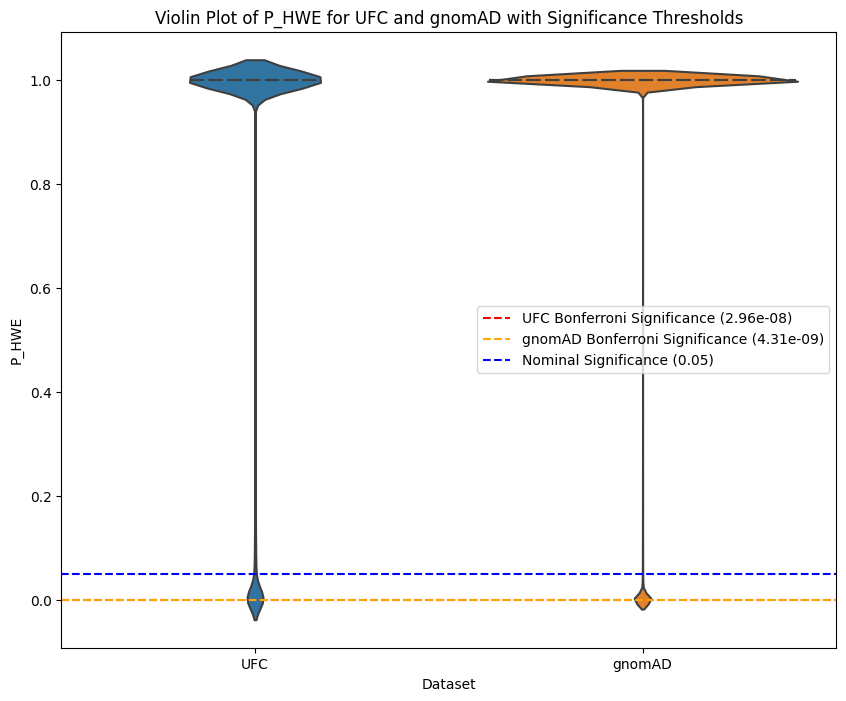

UFC - Total points: 1691948
UFC - Points below nominal significance (0.05): 182351 (10.78%)
UFC - Points below Bonferroni significance (2.96e-08): 61689 (3.65%)
gnomAD - Total points: 11603134
gnomAD - Points below nominal significance (0.05): 625378 (5.39%)
gnomAD - Points below Bonferroni significance (4.31e-09): 435404 (3.75%)


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the TSV files
ufc_file_path = 'ufc_chr22.hwe.tsv'
gnomad_file_path = 'gnomad_chr22.tsv'

# Load UFC data with headers
ufc_df = pd.read_csv(ufc_file_path, sep='\t')

# Load gnomAD data without headers and manually assign column names
gnomad_df = pd.read_csv(gnomad_file_path, sep='\t', header=None)
gnomad_df.columns = ['CHR', 'POS', 'OBS(HOM1/HET/HOM2)', 'E(HOM1/HET/HOM2)', 'P_HWE']

# Convert P_HWE to numeric
ufc_df['P_HWE'] = pd.to_numeric(ufc_df['P_HWE'], errors='coerce')
gnomad_df['P_HWE'] = pd.to_numeric(gnomad_df['P_HWE'], errors='coerce')

# Drop rows where P_HWE could not be converted
ufc_df = ufc_df.dropna(subset=['P_HWE'])
gnomad_df = gnomad_df.dropna(subset=['P_HWE'])

# Add a column to distinguish between UFC and gnomAD
ufc_df['Dataset'] = 'UFC'
gnomad_df['Dataset'] = 'gnomAD'

# Define significance thresholds
bonferroni_threshold_ufc = 0.05 / len(ufc_df)  # Adjust as needed based on the number of tests
bonferroni_threshold_gnomad = 0.05 / len(gnomad_df)  # Adjust as needed based on the number of tests
nominal_threshold = 0.05

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot violin plot for P_HWE
sns.violinplot(x='Dataset', y='P_HWE', data=pd.concat([ufc_df, gnomad_df]), inner='quartile')

# Add horizontal lines for significance thresholds
plt.axhline(y=bonferroni_threshold_ufc, color='red', linestyle='--', label=f'UFC Bonferroni Significance ({bonferroni_threshold_ufc:.2e})')
plt.axhline(y=bonferroni_threshold_gnomad, color='orange', linestyle='--', label=f'gnomAD Bonferroni Significance ({bonferroni_threshold_gnomad:.2e})')
plt.axhline(y=nominal_threshold, color='blue', linestyle='--', label='Nominal Significance (0.05)')

# Adding plot labels and title
plt.ylabel('P_HWE')
plt.title('Violin Plot of P_HWE for UFC and gnomAD with Significance Thresholds')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Count the number of points below each threshold for both datasets
ufc_below_nominal = (ufc_df['P_HWE'] < nominal_threshold).sum()
ufc_below_bonferroni = (ufc_df['P_HWE'] < bonferroni_threshold_ufc).sum()
gnomad_below_nominal = (gnomad_df['P_HWE'] < nominal_threshold).sum()
gnomad_below_bonferroni = (gnomad_df['P_HWE'] < bonferroni_threshold_gnomad).sum()

# Total number of points
total_ufc_points = len(ufc_df)
total_gnomad_points = len(gnomad_df)

# Calculate percentages
percent_ufc_below_nominal = (ufc_below_nominal / total_ufc_points) * 100
percent_ufc_below_bonferroni = (ufc_below_bonferroni / total_ufc_points) * 100
percent_gnomad_below_nominal = (gnomad_below_nominal / total_gnomad_points) * 100
percent_gnomad_below_bonferroni = (gnomad_below_bonferroni / total_gnomad_points) * 100

# Print the results
print(f"UFC - Total points: {total_ufc_points}")
print(f"UFC - Points below nominal significance ({nominal_threshold}): {ufc_below_nominal} ({percent_ufc_below_nominal:.2f}%)")
print(f"UFC - Points below Bonferroni significance ({bonferroni_threshold_ufc:.2e}): {ufc_below_bonferroni} ({percent_ufc_below_bonferroni:.2f}%)")

print(f"gnomAD - Total points: {total_gnomad_points}")
print(f"gnomAD - Points below nominal significance ({nominal_threshold}): {gnomad_below_nominal} ({percent_gnomad_below_nominal:.2f}%)")
print(f"gnomAD - Points below Bonferroni significance ({bonferroni_threshold_gnomad:.2e}): {gnomad_below_bonferroni} ({percent_gnomad_below_bonferroni:.2f}%)")


## Hardy Weinberg Snps filtered to >1% freq

/tmp/ipykernel_970/2943723822.py:13: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  gnomad_df = pd.read_csv(gnomad_file_path, sep='\t', header=None)


1691986 7724269
1691948 7724269


214755 127981


,CHR,POS,OBS(HOM1/HET/HOM2),E(HOM1/HET/HOM2),P_HWE,AF
360,chr22,10511391,18571/3814/613,14022.5/7870.96/1104.51,0.0000,0.109575
506,chr22,10512006,57/3/0,54.15/5.7/0.15,1.0000,0.025000
512,chr22,10512970,29/1/0,28.0333/1.93333/0.0333333,1.0000,0.016667
526,chr22,10513066,491/10/1,478.287/23.4263/0.286853,0.0643,0.011952
591,chr22,10513313,25605/1206/2617,17957.3/10061.3/1409.32,0.0000,0.109420


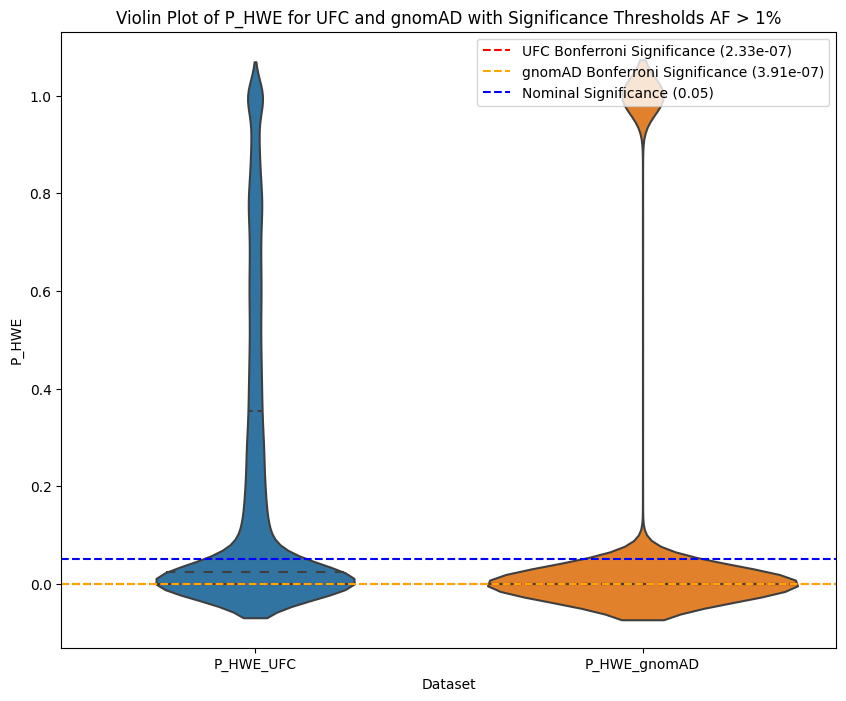

UFC - Total points: 214755
UFC - Points below nominal significance (0.05): 118093 (54.99%)
UFC - Points below Bonferroni significance (2.33e-07): 56124 (26.13%)
gnomAD - Total points: 127981
gnomAD - Points below nominal significance (0.05): 107933 (84.34%)
gnomAD - Points below Bonferroni significance (3.91e-07): 107341 (83.87%)


,CHR,POS,OBS(HOM1/HET/HOM2)_UFC,E(HOM1/HET/HOM2)_UFC,ChiSq_HWE,P_HWE_UFC,P_HET_DEFICIT,P_HET_EXCESS,AF_UFC,Dataset_UFC,OBS(HOM1/HET/HOM2)_gnomAD,E(HOM1/HET/HOM2)_gnomAD,P_HWE_gnomAD,AF_gnomAD,Dataset_gnomAD
0,chr22,10511391,265/184/303,169.48/375.04/207.48,1.951242e+02,2.919795e-46,2.602016e-46,1.000000e+00,0.525266,UFC,18571/3814/613,14022.5/7870.96/1104.51,0.0000,0.109575,gnomAD
1,chr22,10512006,19/9/42,7.89/31.22/30.89,3.545981e+01,2.244101e-09,2.244101e-09,1.000000e+00,0.664286,UFC,57/3/0,54.15/5.7/0.15,1.0000,0.025000,gnomAD
2,chr22,10513066,130/4/4,126.26/11.48/0.26,5.857713e+01,9.326346e-06,9.326346e-06,1.000000e+00,0.043478,UFC,491/10/1,478.287/23.4263/0.286853,0.0643,0.011952,gnomAD
3,chr22,10513313,406/29/171,291.78/257.43/56.78,4.771585e+02,2.668172e-114,2.668172e-114,1.000000e+00,0.306106,UFC,25605/1206/2617,17957.3/10061.3/1409.32,0.0000,0.109420,gnomAD
4,chr22,10514369,81/1/8,73.80/15.39/0.80,7.868723e+01,4.511431e-11,4.511431e-11,1.000000e+00,0.094444,UFC,4012/28/240,3324.29/895.412/60.2957,0.0000,0.059346,gnomAD
5,chr22,10514536,528/79/208,395.16/344.68/75.16,4.842188e+02,1.000059e-109,1.000059e-109,1.000000e+00,0.303681,UFC,5353/421/302,4198.91/1704.18/172.915,0.0000,0.084348,gnomAD
6,chr22,10514994,255/630/1130,161.24/817.52/1036.24,1.060153e+02,8.092890e-24,6.017238e-24,1.000000e+00,0.717122,UFC,8772/4602/906,4332.9/7066.18/2880.91,0.0000,0.224580,gnomAD
7,chr22,10515882,2095/339/148,1986.04/556.92/39.04,3.953261e+02,3.535773e-63,3.535773e-63,1.000000e+00,0.122967,UFC,84346/7858/432,76013.2/15801.6/821.207,0.0000,0.047077,gnomAD
8,chr22,10516173,2913/267/85,2842.62/407.76/14.62,3.890566e+02,9.303141e-49,9.303141e-49,1.000000e+00,0.066922,UFC,72506/1499/1,71034.4/2941.11/30.4434,0.9995,0.010141,gnomAD
9,chr22,10516212,3002/410/108,2921.83/570.34/27.83,2.781906e+02,4.295264e-42,4.295264e-42,1.000000e+00,0.088920,UFC,76466/3091/7,73475.2/5967.66/121.173,1.0000,0.019513,gnomAD


## HWE classification of snps (>1% freq) in UFC and AoU

P > 0.05 (UFC) & P > 0.05 (gnomAD): 1099288
P > 0.05 (UFC) & 0.05 >= P >= bonferroni (gnomAD): 101059
P > 0.05 (UFC) & P < bonferroni (gnomAD): 142072
0.05 >= P >= bonferroni (UFC) & P > 0.05 (gnomAD): 34777
0.05 >= P >= bonferroni (UFC) & 0.05 >= P >= bonferroni (gnomAD): 7165
0.05 >= P >= bonferroni (UFC) & P < bonferroni (gnomAD): 75224
P < bonferroni (UFC) & P > 0.05 (gnomAD): 28486
P < bonferroni (UFC) & 0.05 >= P >= bonferroni (gnomAD): 1609
P < bonferroni (UFC) & P < bonferroni (gnomAD): 31313
                               P > 0.05 (gnomAD)  \
P > 0.05 (UFC)                           1099288   
0.05 >= P >= bonferroni (UFC)              34777   
P < bonferroni (UFC)                       28486   

                               0.05 >= P >= bonferroni (gnomAD)  \
P > 0.05 (UFC)                                           101059   
0.05 >= P >= bonferroni (UFC)                              7165   
P < bonferroni (UFC)                                       1609   

                

# Random Forest W/ Hail

/tmp/ipykernel_9611/22003470.py:4: DtypeWarning: Columns (3,4,5,6,7,8,10,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ht_path,sep='\t')


,locus,alleles,allele_type,pab_max_expr,Inbreeding_Coeff,qd,MQRankSum,ReadPosRankSum,SOR,variant_type,n_alt_alleles,has_star,was_mixed,rf_probability,rf_prediction,fp_prob,tp_prob
987230,chr22:34811287,"[""A"",""AAGAAAG""]",non-h-indel,1.0000e+00,-8.3530e-01,1.1130e+01,0.0000e+00,0.0000e+00,7.2500e-01,multi-Indel,6,true,true,"[{""key"":""False"",""value"":0.8899079506872911},{""key"":""True"",""value"":0.11009204931270894}]",False,0.889908,0.110092
79954,chr22:11217991,"[""G"",""A""]",snp,0.063568,-0.8196,6.55,-2.25,-2.25,1.387,SNV,1,False,False,"[{""key"":""False"",""value"":0.9812840076050706},{""key"":""True"",""value"":0.01871599239492936}]",False,0.981284,0.018716
567130,chr22:29100185,"[""G"",""A""]",snp,1.0000e+00,-8.6210e-01,1.4300e+01,0.0000e+00,-1.5000e+00,8.0800e-01,SNV,1,false,false,"[{""key"":""False"",""value"":0.05089766846837913},{""key"":""True"",""value"":0.9491023315316208}]",True,0.050898,0.949102
500891,chr22:27728605,"[""AAGGAAAGGAAAGGAAAG"",""*""]",snp,1.0000e+00,-8.5710e-01,0.0000e+00,-1.5000e+00,1.0000e+00,8.3700e-01,multi-Indel,7,true,true,"[{""key"":""False"",""value"":0.9695545014939225},{""key"":""True"",""value"":0.030445498506077445}]",False,0.969555,0.030445
55399,chr22:10934458,"[""A"",""T""]",snp,7.0774e-10,-5.4490e-01,1.0600e+00,-5.0000e+00,1.6500e+00,5.8900e-01,SNV,1,false,false,"[{""key"":""False"",""value"":0.9780018851408855},{""key"":""True"",""value"":0.021998114859114473}]",False,0.978002,0.021998
135049,chr22:11705335,"[""CATATATATATGT"",""CATATATATATATATGTATATATATATATACATATATATATATATGT""]",non-h-indel,1.2500e-01,-8.1960e-01,5.1000e-01,-7.0000e-01,6.0000e-01,6.0600e-01,multi-Indel,17,true,true,"[{""key"":""False"",""value"":0.9858041741802156},{""key"":""True"",""value"":0.014195825819784406}]",False,0.985804,0.014196
693949,chr22:31536908,"[""TAA"",""T""]",h-indel,1.6094e-02,-8.3980e-01,5.3100e+00,0.0000e+00,-2.2000e+00,8.9000e-01,multi-Indel,2,false,false,"[{""key"":""False"",""value"":0.9863088598940324},{""key"":""True"",""value"":0.013691140105967572}]",False,0.986309,0.013691
732056,chr22:12109236,"[""G"",""C""]",snp,1.4600e-01,-9.2860e-01,3.5770e+01,-6.0000e-01,0.0000e+00,2.6700e+00,SNV,1,false,false,"[{""key"":""False"",""value"":0.8393011939737997},{""key"":""True"",""value"":0.16069880602620032}]",False,0.839301,0.160699
51333,chr22:10835541,"[""TAGAG"",""TAG""]",non-h-indel,1.0000e+00,3.4440e-01,1.1600e+00,-1.0000e+00,9.0000e-01,5.0700e-01,multi-Indel,4,true,true,"[{""key"":""False"",""value"":0.9819753519543675},{""key"":""True"",""value"":0.018024648045632422}]",False,0.981975,0.018025
995352,chr22:34960515,"[""T"",""C""]",snp,4.1769e-01,-8.3530e-01,1.6580e+01,0.0000e+00,3.0000e-01,4.6500e-01,SNV,1,false,false,"[{""key"":""False"",""value"":0.10495157864790366},{""key"":""True"",""value"":0.8950484213520964}]",True,0.104952,0.895048


SNVs Summary Statistics:
Total SNVs: 819482
TP Count in SNVs: 464984
Percentage of TP in SNVs: 56.74%

Indels Summary Statistics:
Total Indels: 180517
TP Count in Indels: 48604
Percentage of TP in Indels: 26.92%


/tmp/ipykernel_9611/3734152601.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_snv_fp['rf_probability'] = df_snv_fp['rf_probability'].apply(lambda x: next(d['value'] for d in x if d['key'] == 'True'))
/tmp/ipykernel_9611/3734152601.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_snv_tp['rf_probability'] = df_snv_tp['rf_probability'].apply(lambda x: next(d['value'] for d in x if d['key'] == 'True'))
/tmp/ipykernel_9611/3734152601.py:22: SettingWithCopyWarning: 
A value is trying to be set on 

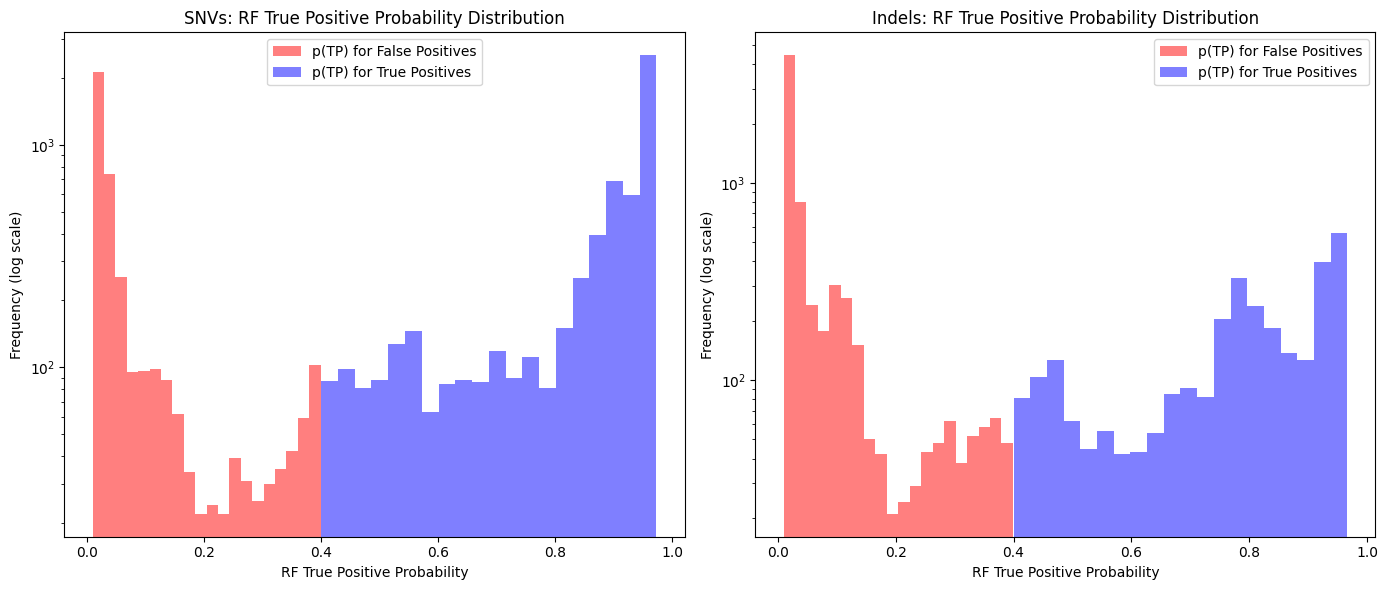

!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/6ede2b60-6c04-44c6-8111-25350e603c98/call-GraphDeNovoSnps/threshold_stats.png snp_de_novo.png
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/6ede2b60-6c04-44c6-8111-25350e603c98/call-GraphDeNovoIndels/threshold_stats.png indel_de_novo.png

## Total Variants

### SNPs

#### Version 1

#### Version 2

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/2fabefbf-4aec-4df1-8f19-8b54426d5f15/call-GraphTotalSnps/threshold_stats_SNPs.png...
/ [1/1 files][ 45.9 KiB/ 45.9 KiB] 100% Done                                    
Operation completed over 1 objects/45.9 KiB.                                     


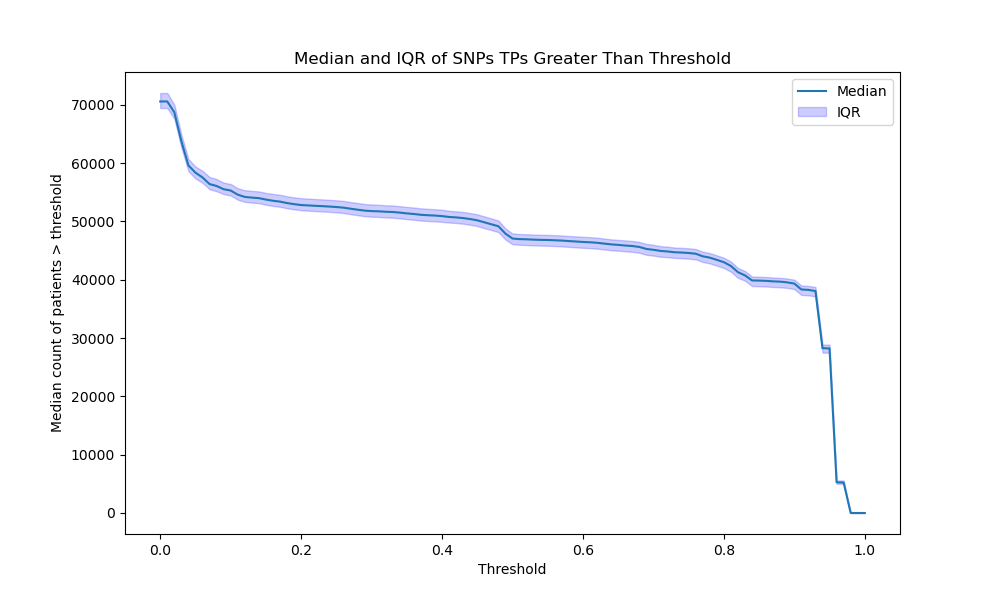

#### Version 3

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_5_COUNT_VARIANTS/4e1bfb1d-5494-42ac-966b-dcf7f0874f52/call-GraphTotalSnps/threshold_stats_SNPs.png...
/ [1/1 files][ 45.1 KiB/ 45.1 KiB] 100% Done                                    
Operation completed over 1 objects/45.1 KiB.                                     


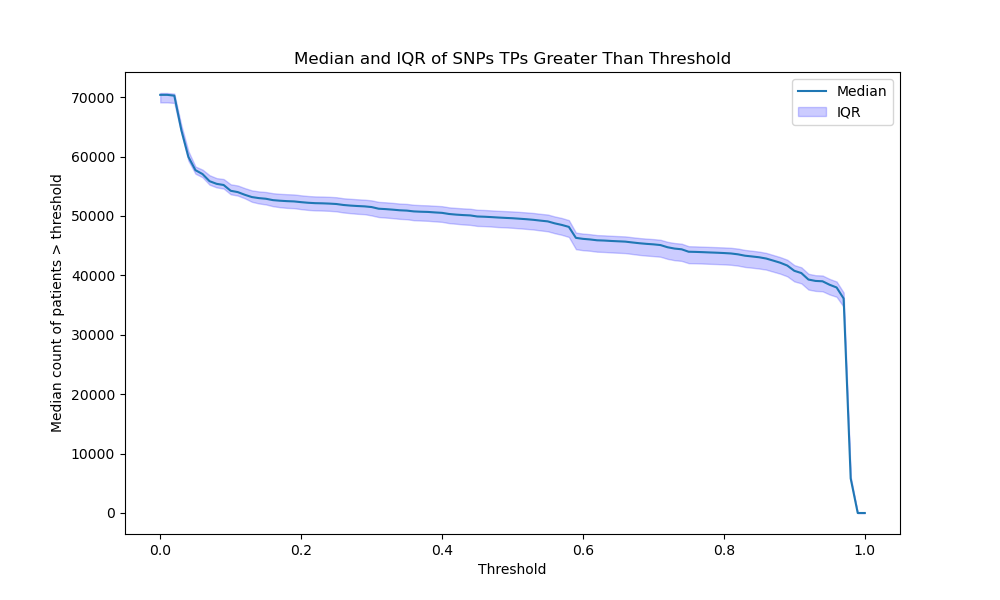

#### Version 4

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_5_COUNT_VARIANTS/2753ac74-7b5d-4832-bd22-11d4fae27d1d/call-GraphTotalSnps/threshold_stats_SNPs.png...
/ [1/1 files][ 50.3 KiB/ 50.3 KiB] 100% Done                                    
Operation completed over 1 objects/50.3 KiB.                                     


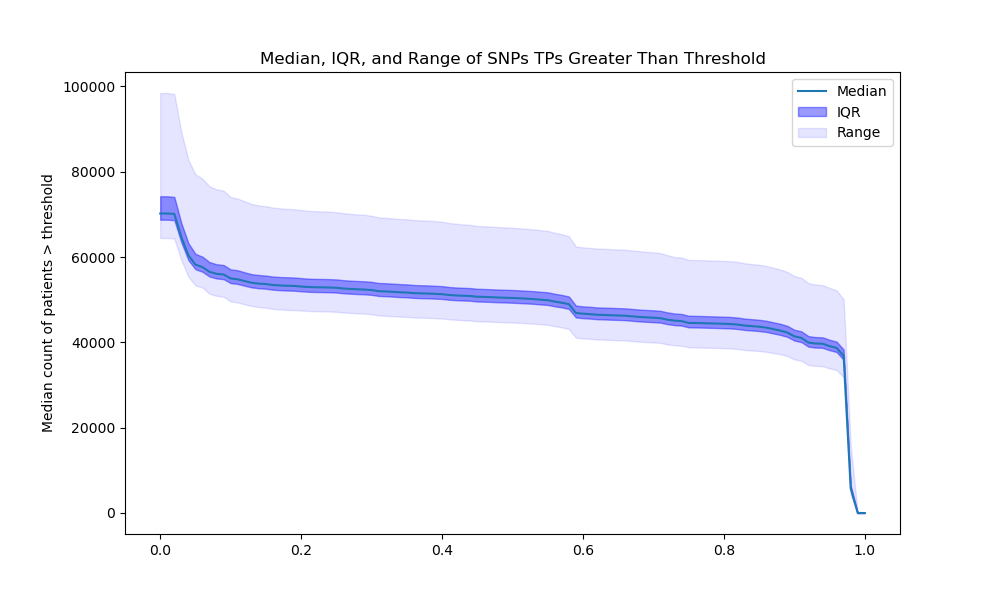

#### Verion 5

In [5]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_5_COUNT_VARIANTS/710ef086-7865-419e-97a1-eb3f01e5cff6/call-GraphTotalVariants/variant_count.png .

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_5_COUNT_VARIANTS/710ef086-7865-419e-97a1-eb3f01e5cff6/call-GraphTotalVariants/variant_count.png...
/ [1/1 files][221.8 KiB/221.8 KiB] 100% Done                                    
Operation completed over 1 objects/221.8 KiB.                                    


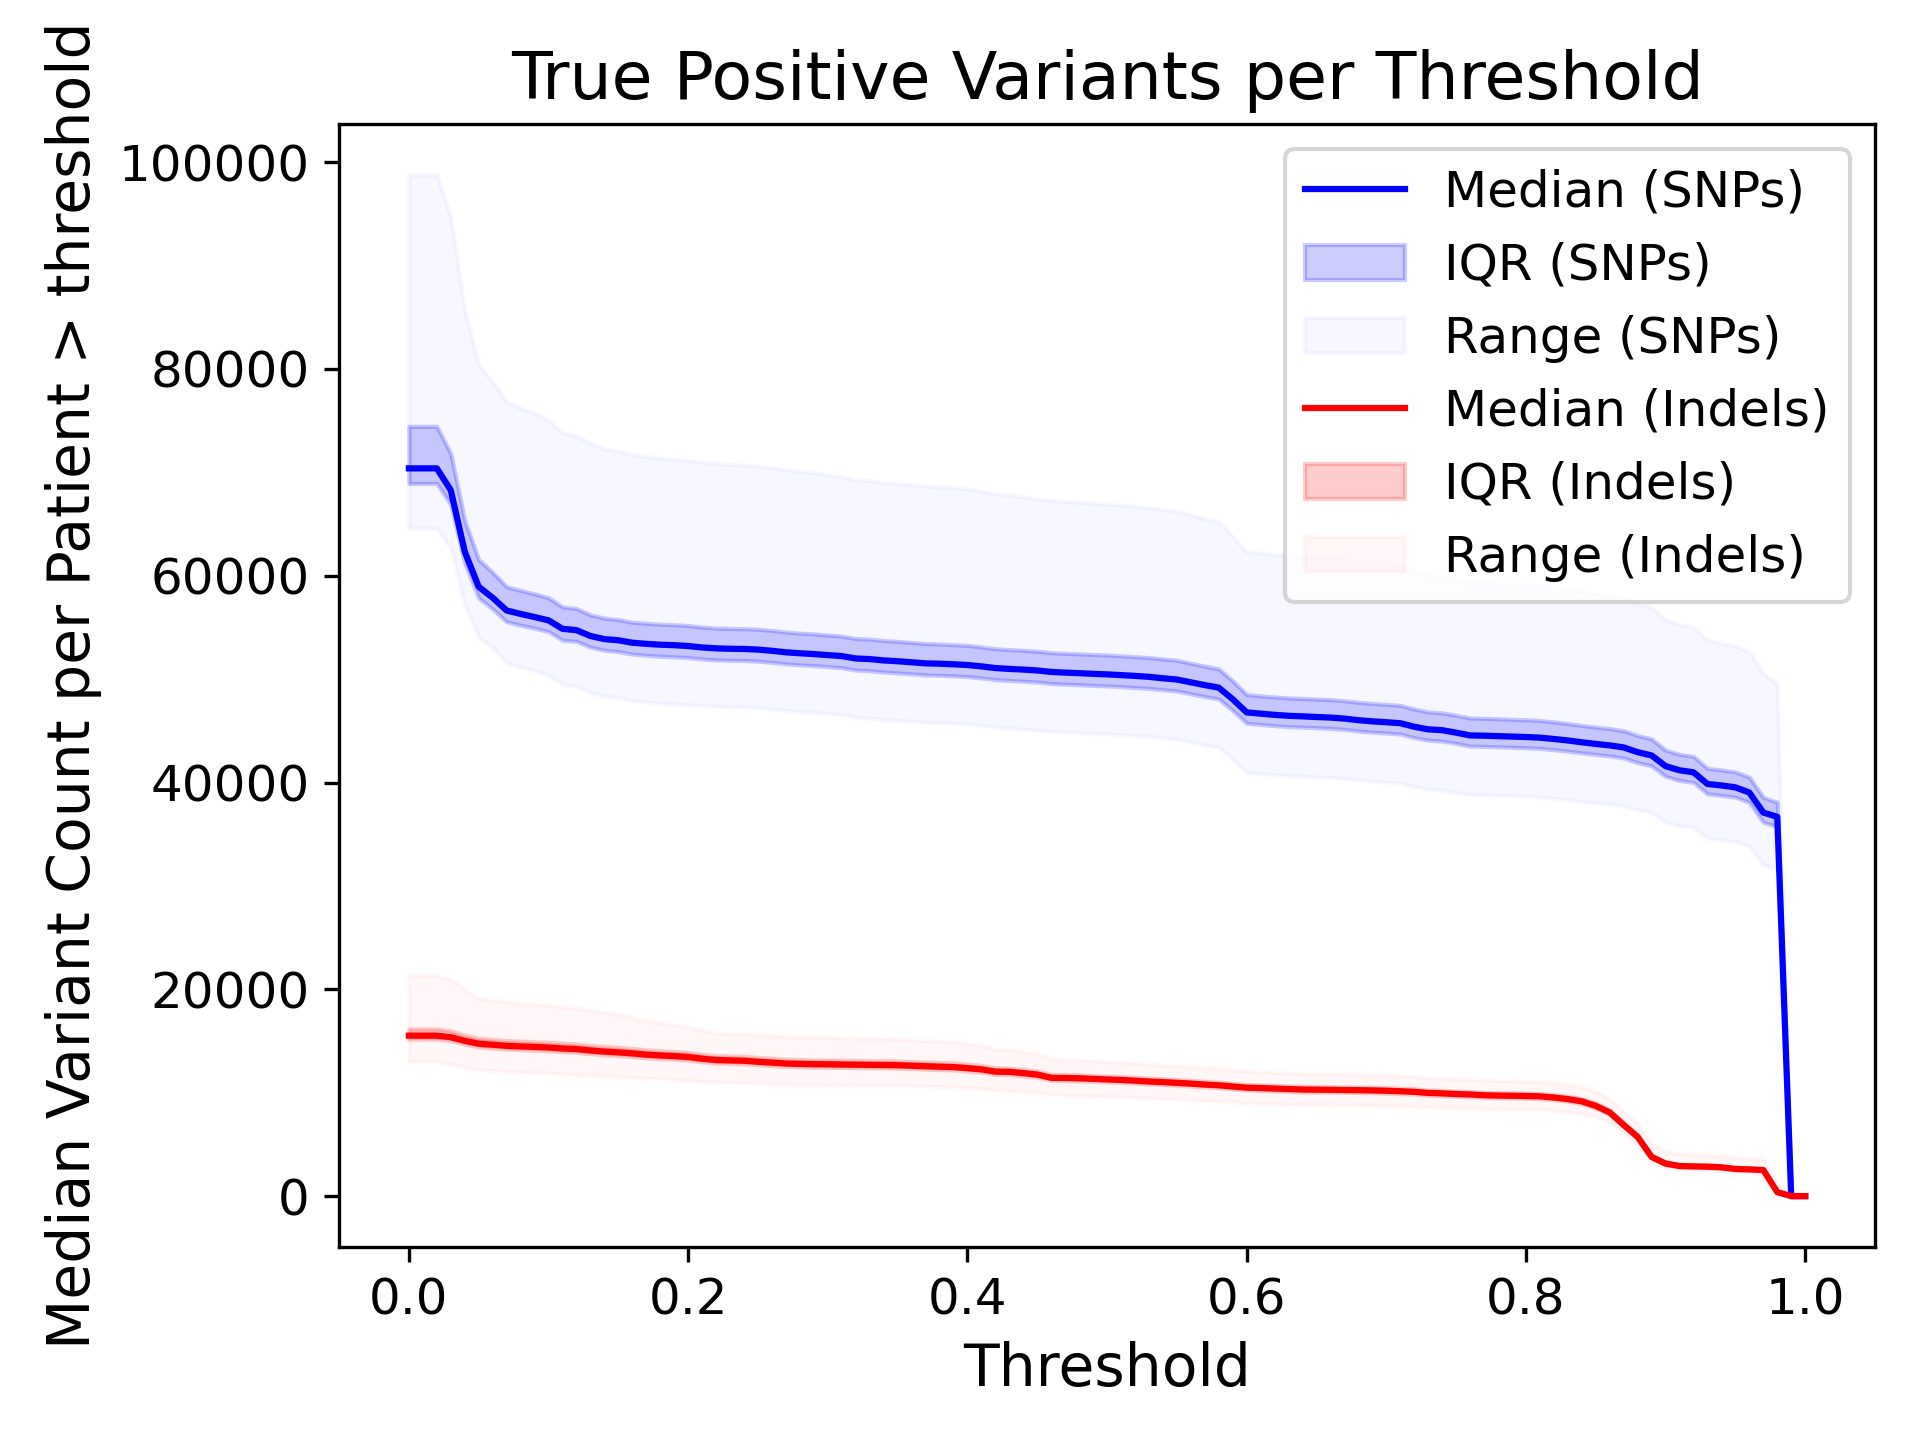

In [6]:
from IPython.display import Image

# Path to your PNG file
Image(filename='variant_count.png')

### Indels

#### Version 1

#### Version 2

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/2fabefbf-4aec-4df1-8f19-8b54426d5f15/call-GraphTotalIndels/threshold_stats_Indels.png...
/ [1/1 files][ 48.2 KiB/ 48.2 KiB] 100% Done                                    
Operation completed over 1 objects/48.2 KiB.                                     


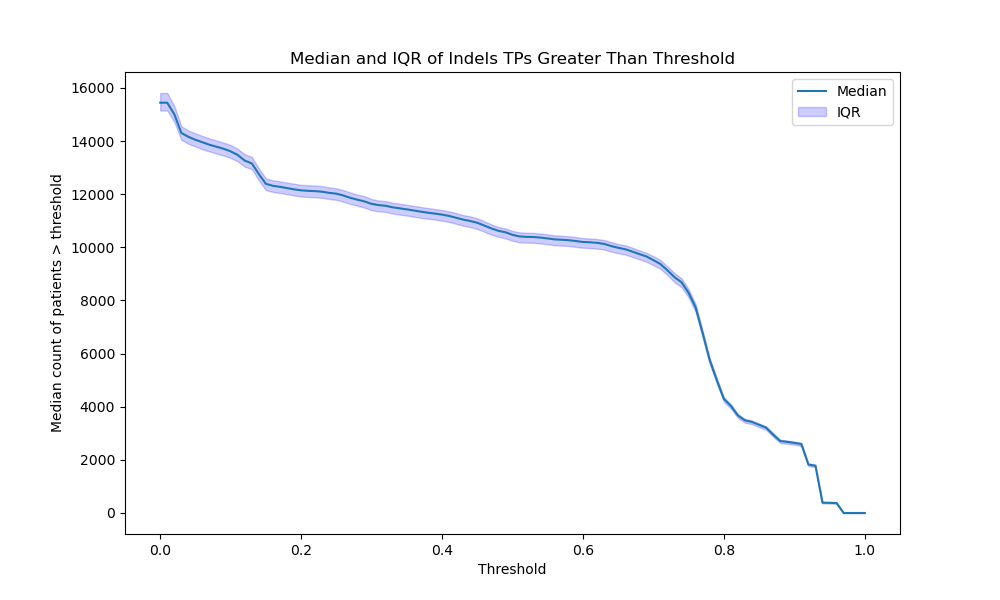

#### Version 3

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_5_COUNT_VARIANTS/2753ac74-7b5d-4832-bd22-11d4fae27d1d/call-GraphTotalIndels/threshold_stats_Indels.png...
/ [1/1 files][ 56.5 KiB/ 56.5 KiB] 100% Done                                    
Operation completed over 1 objects/56.5 KiB.                                     


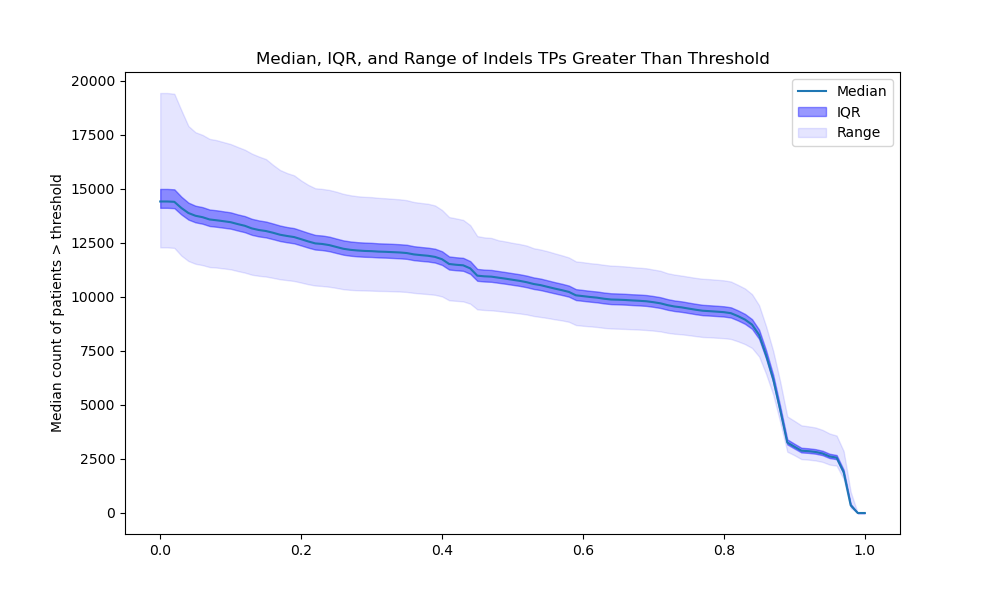

In [6]:
from IPython.display import Image

# Path to your PNG file
Image(filename='indel_total.v3.png')

## De Novo Graphs

### SNPs

#### Version 1

In [18]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/dc8cf745-8f42-48fc-8add-311c6064a646/call-GraphDeNovoSnps/threshold_stats.png snp_de_novo.v1.png

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/dc8cf745-8f42-48fc-8add-311c6064a646/call-GraphDeNovoSnps/threshold_stats.png...
/ [1/1 files][ 39.5 KiB/ 39.5 KiB] 100% Done                                    
Operation completed over 1 objects/39.5 KiB.                                     


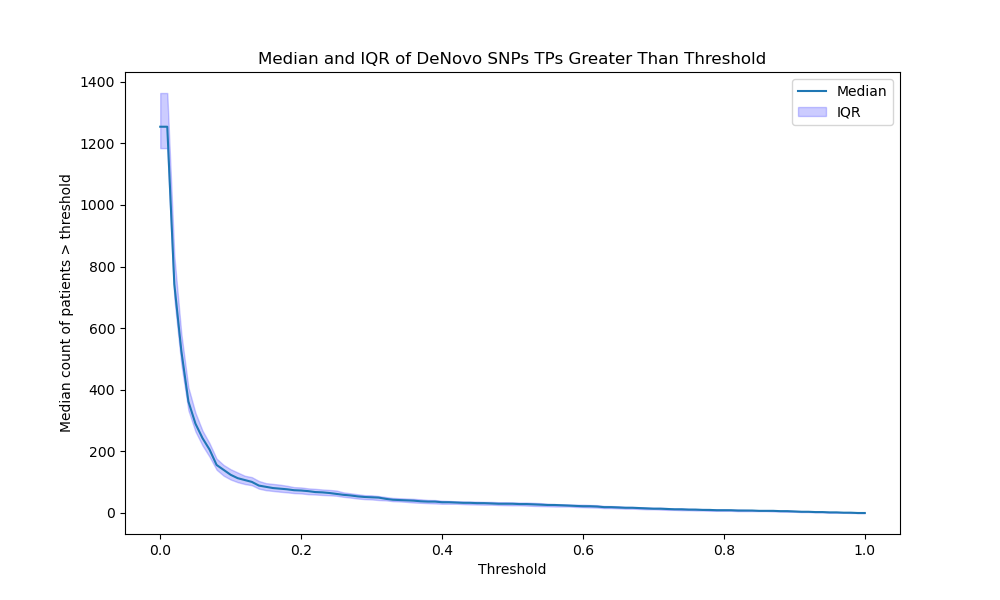

#### Version 2

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/2fabefbf-4aec-4df1-8f19-8b54426d5f15/call-GraphDeNovoSnps/threshold_stats_DeNovo_SNPs.png...
/ [1/1 files][ 38.4 KiB/ 38.4 KiB] 100% Done                                    
Operation completed over 1 objects/38.4 KiB.                                     


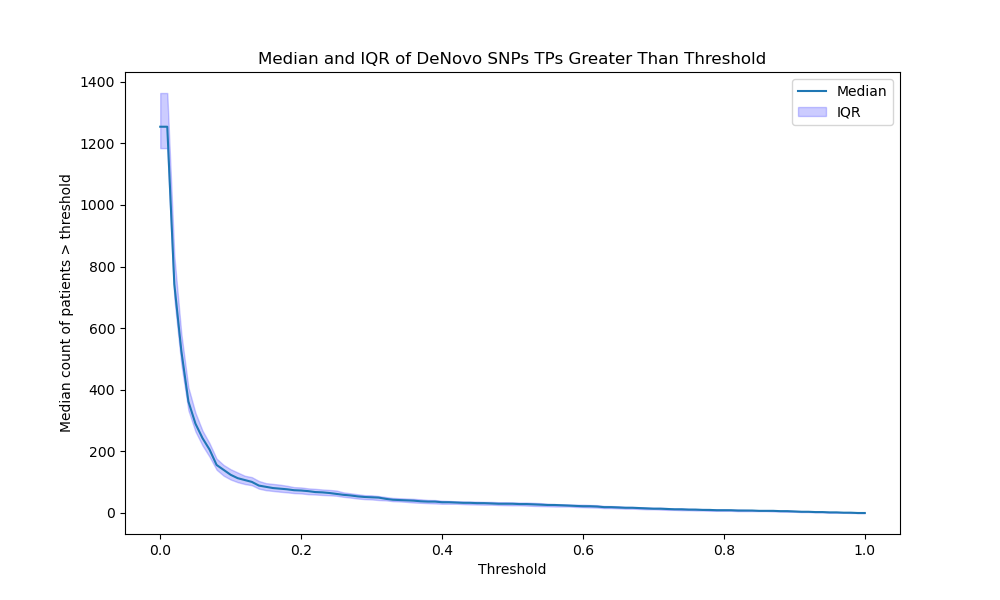

#### Version 3

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_5_COUNT_VARIANTS/4e1bfb1d-5494-42ac-966b-dcf7f0874f52/call-GraphDeNovoSnps/threshold_stats_DeNovo_SNPs.png...
/ [1/1 files][ 37.5 KiB/ 37.5 KiB] 100% Done                                    
Operation completed over 1 objects/37.5 KiB.                                     


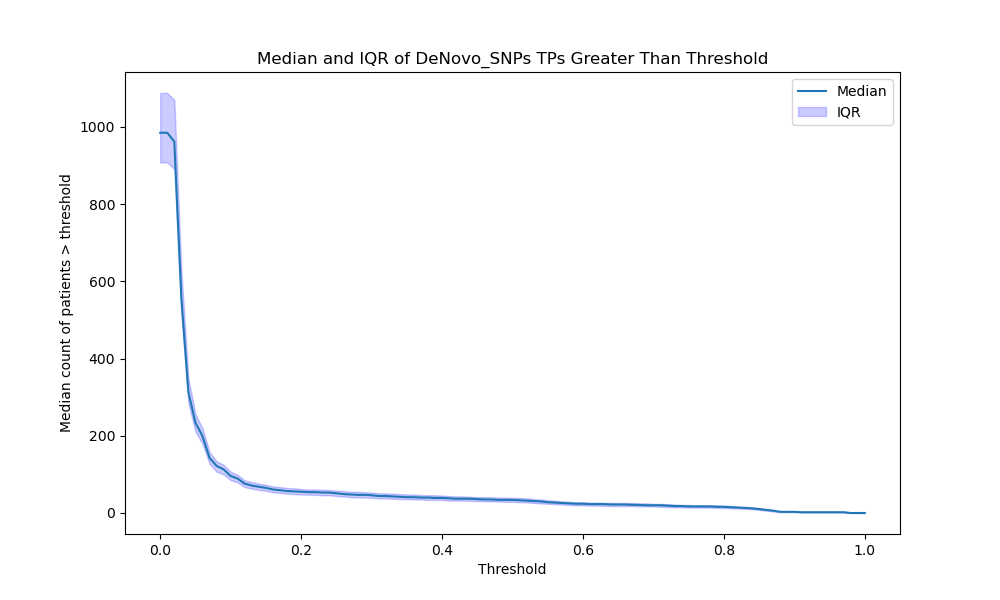

#### Version 5

In [5]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_5_COUNT_VARIANTS/ac87e20d-d2ca-48c6-966a-92981d79b92a/call-GraphTotalDenovos/variant_count.png denovo_count.png

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_5_COUNT_VARIANTS/ac87e20d-d2ca-48c6-966a-92981d79b92a/call-GraphTotalDenovos/variant_count.png...
/ [1/1 files][169.7 KiB/169.7 KiB] 100% Done                                    
Operation completed over 1 objects/169.7 KiB.                                    


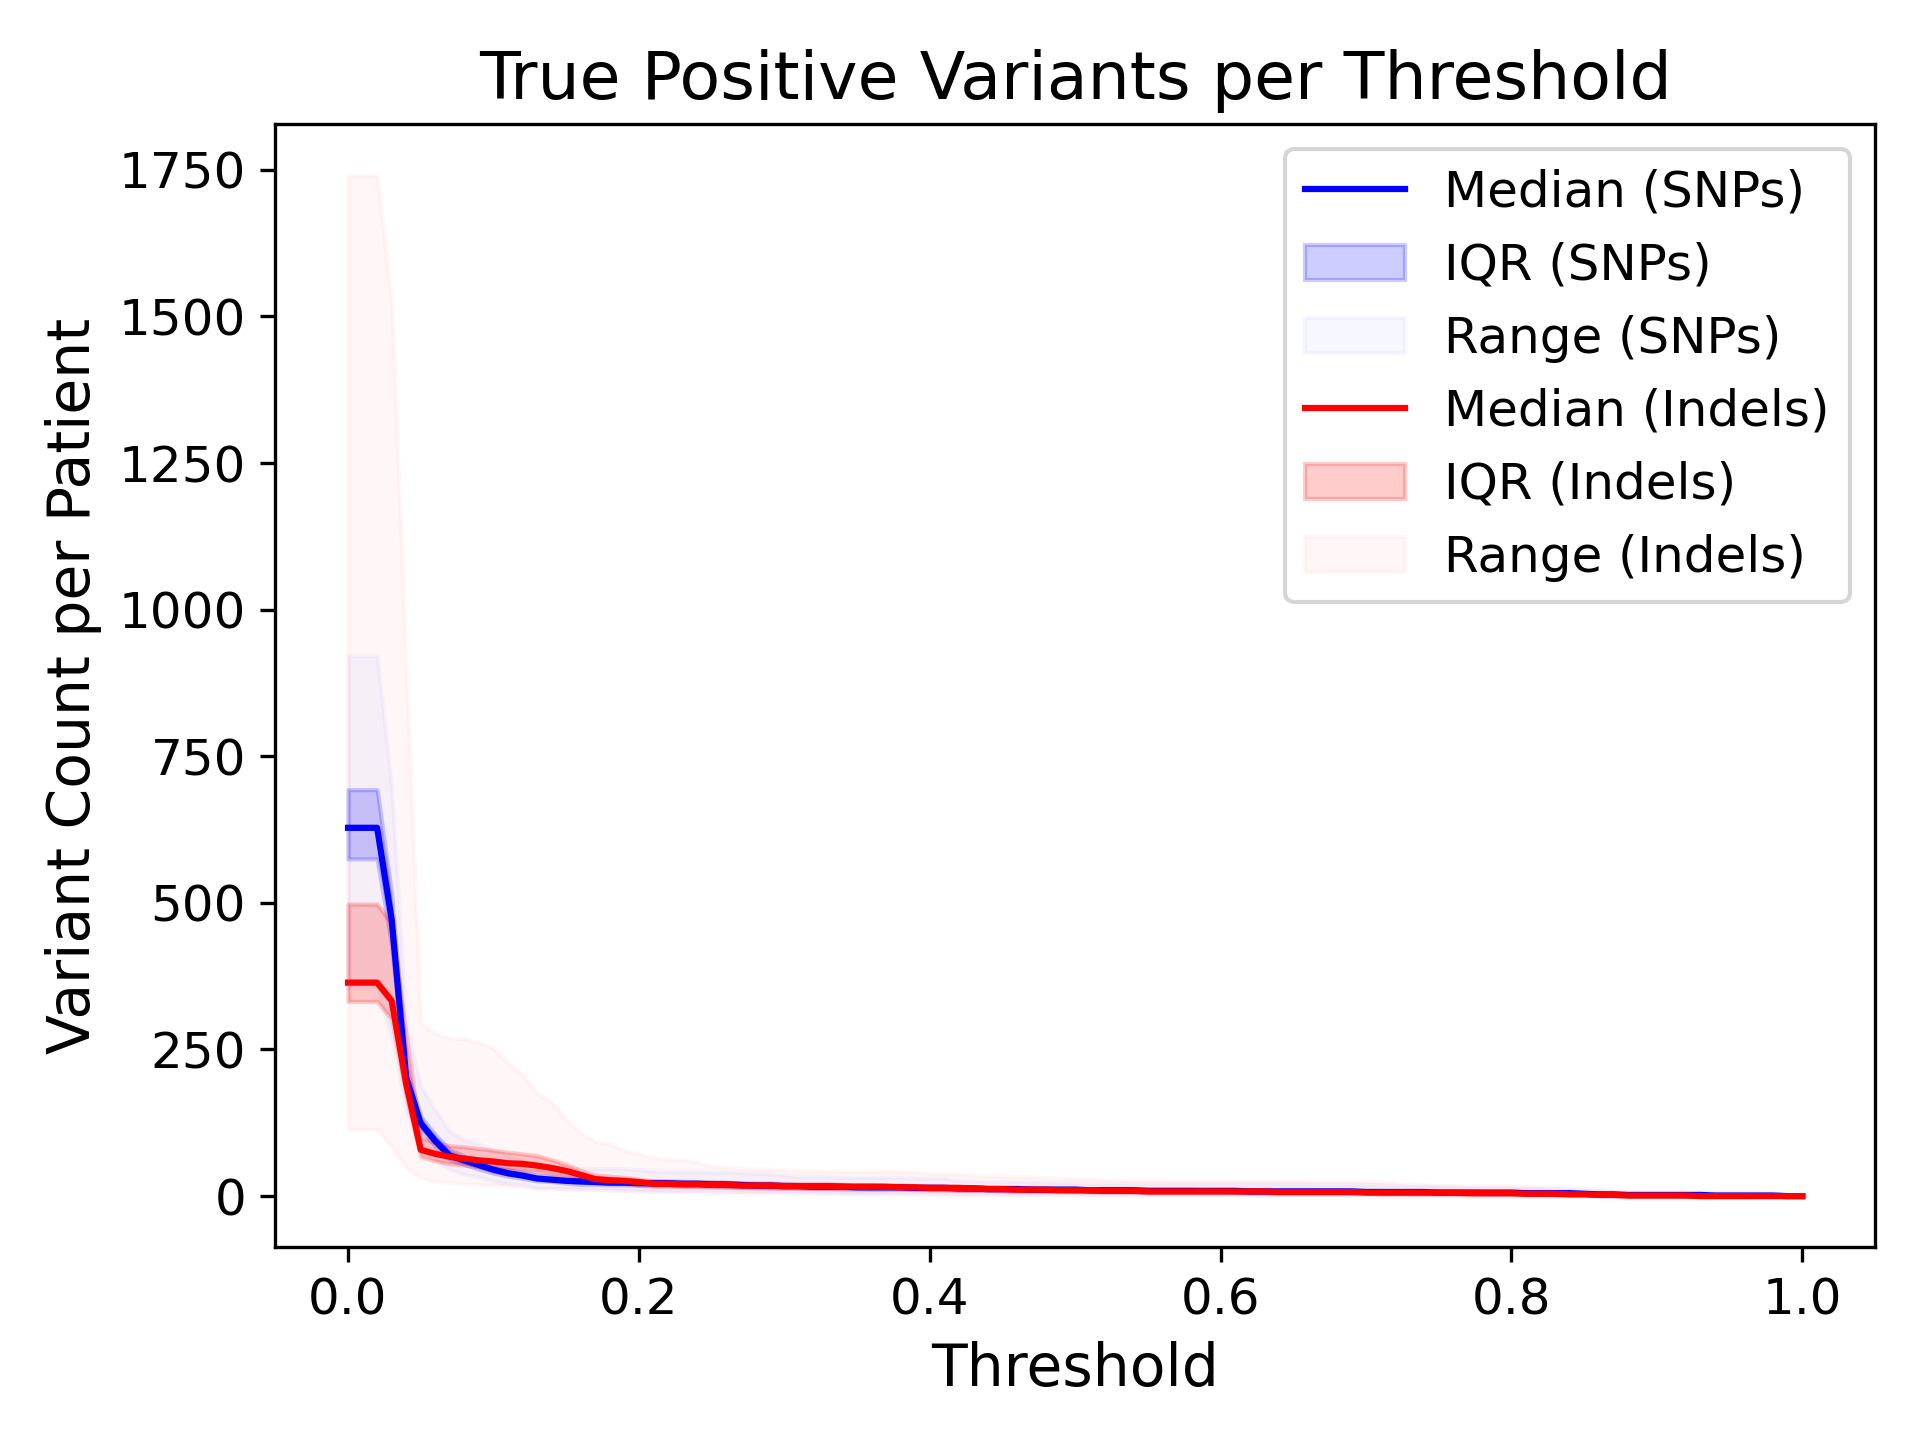

In [6]:
from IPython.display import Image

# Path to your PNG file
Image(filename='denovo_count.png')

### Indels

#### Version 1

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/dc8cf745-8f42-48fc-8add-311c6064a646/call-GraphDeNovoIndels/threshold_stats.png...
/ [1/1 files][ 40.6 KiB/ 40.6 KiB] 100% Done                                    
Operation completed over 1 objects/40.6 KiB.                                     


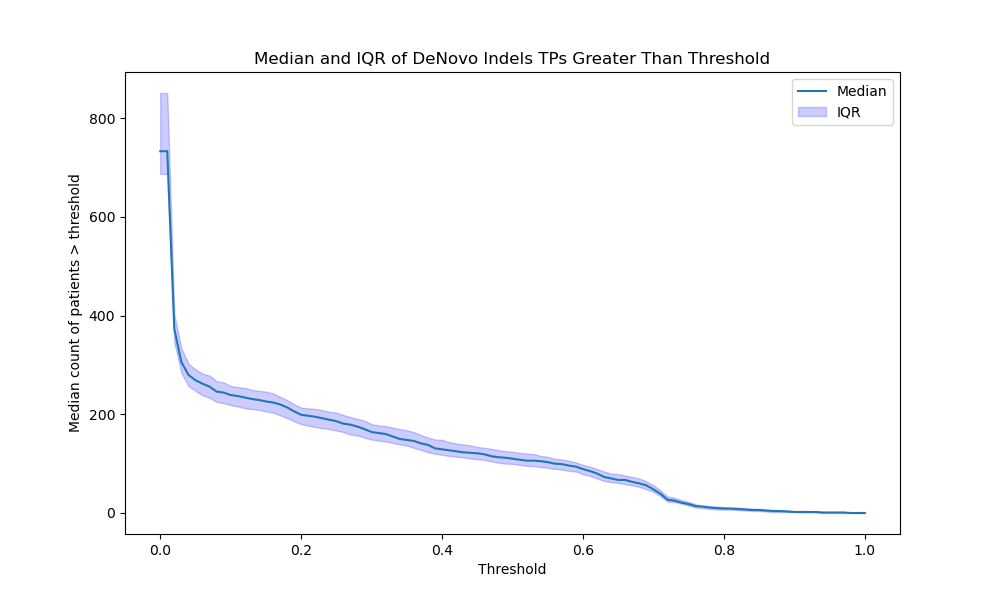

#### Version 2

In [13]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/2fabefbf-4aec-4df1-8f19-8b54426d5f15/call-GraphDeNovoIndels/threshold_stats_DeNovo_Indels.png indel_de_novo.v2.png

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/2fabefbf-4aec-4df1-8f19-8b54426d5f15/call-GraphDeNovoIndels/threshold_stats_DeNovo_Indels.png...
/ [1/1 files][ 45.2 KiB/ 45.2 KiB] 100% Done                                    
Operation completed over 1 objects/45.2 KiB.                                     


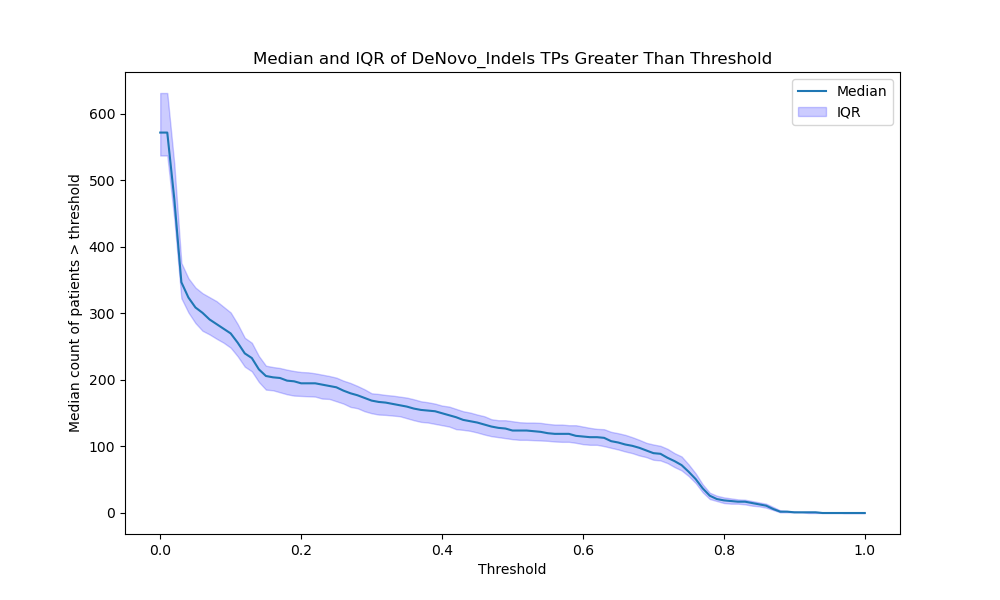

In [14]:
from IPython.display import Image

# Path to your PNG file
Image(filename='indel_de_novo.v2.png')

## Sensitivity Analysis

### SNPs

#### Version 1

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_2/f538eb8b-b4b6-40c3-b1e2-d0082c87a287/call-plot_sensitivity_snps/sensitivity_plot.png...
/ [1/1 files][ 19.4 KiB/ 19.4 KiB] 100% Done                                    
Operation completed over 1 objects/19.4 KiB.                                     


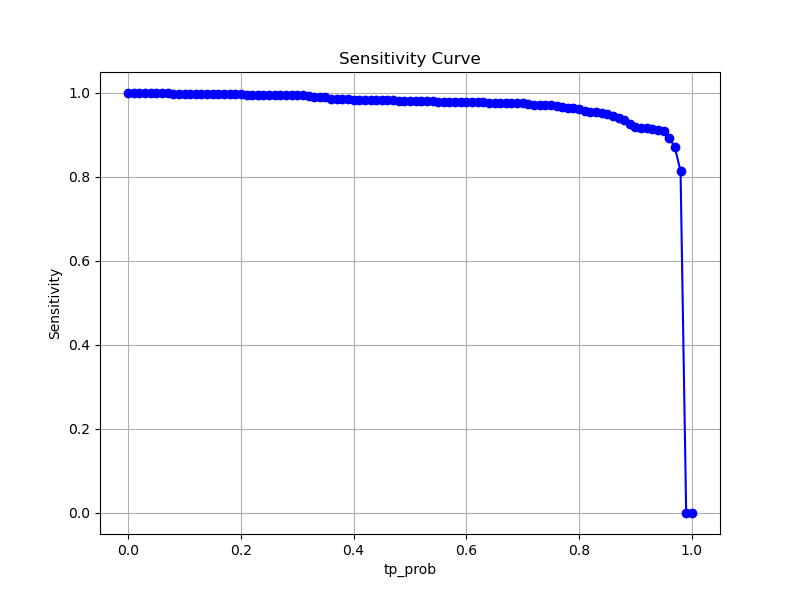

#### Version 2

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_2/b2ea7d39-ca72-4b60-891a-1a6055560759/call-plot_sensitivity_snps/sensitivity_plot_snp.png...
/ [1/1 files][ 21.9 KiB/ 21.9 KiB] 100% Done                                    
Operation completed over 1 objects/21.9 KiB.                                     


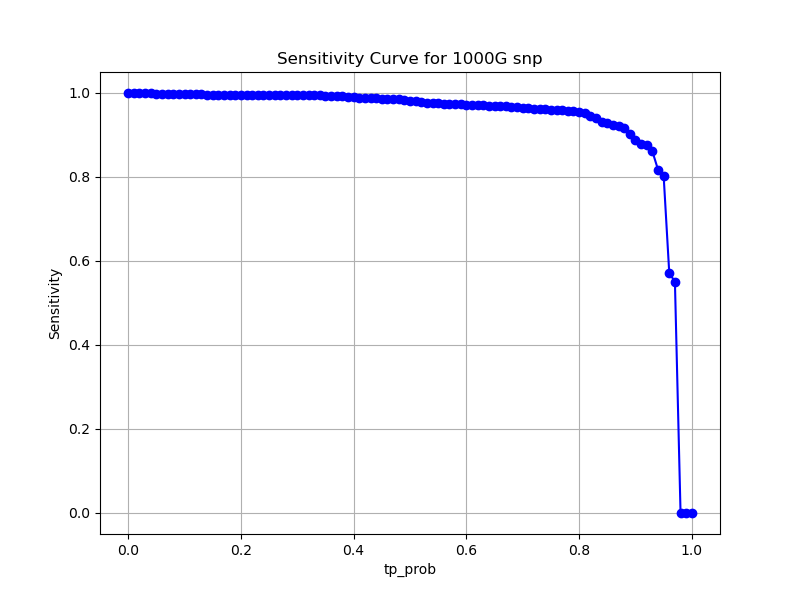

In [10]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_6_VARIANT_SENSITIVITY/9903cbba-8cb3-4616-8bf1-1a10fdacdb43/call-plot_sensitivity_snps/sensitivity_plot_snp.png sensitivity_plot_snps.v3.png

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_6_VARIANT_SENSITIVITY/9903cbba-8cb3-4616-8bf1-1a10fdacdb43/call-plot_sensitivity_snps/sensitivity_plot_snp.png...
/ [1/1 files][ 21.0 KiB/ 21.0 KiB] 100% Done                                    
Operation completed over 1 objects/21.0 KiB.                                     


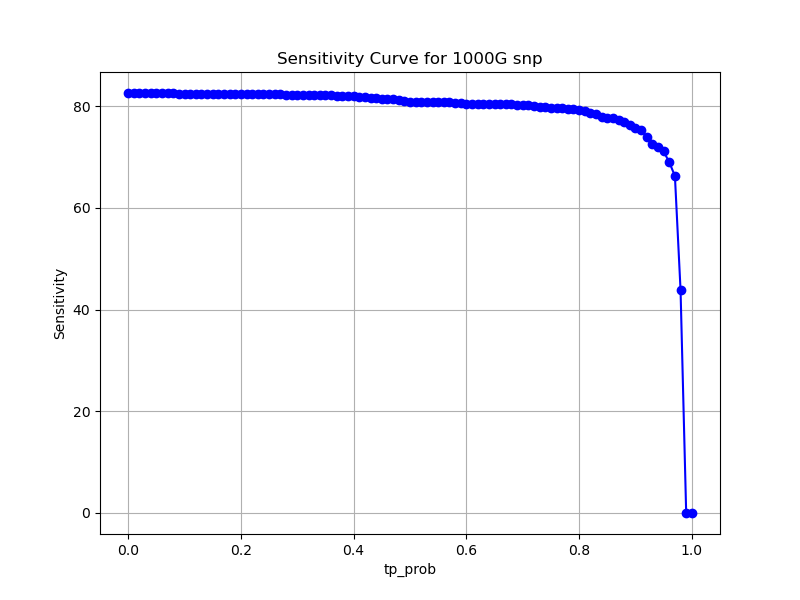

In [11]:
from IPython.display import Image

# Path to your PNG file
Image(filename='sensitivity_plot_snps.v3.png')

### Indels

#### Version 1

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_2/a39b45de-a89b-4e93-9b67-39998ece847d/call-plot_sensitivity_indels/sensitivity_plot.png...
/ [1/1 files][ 20.4 KiB/ 20.4 KiB] 100% Done                                    
Operation completed over 1 objects/20.4 KiB.                                     


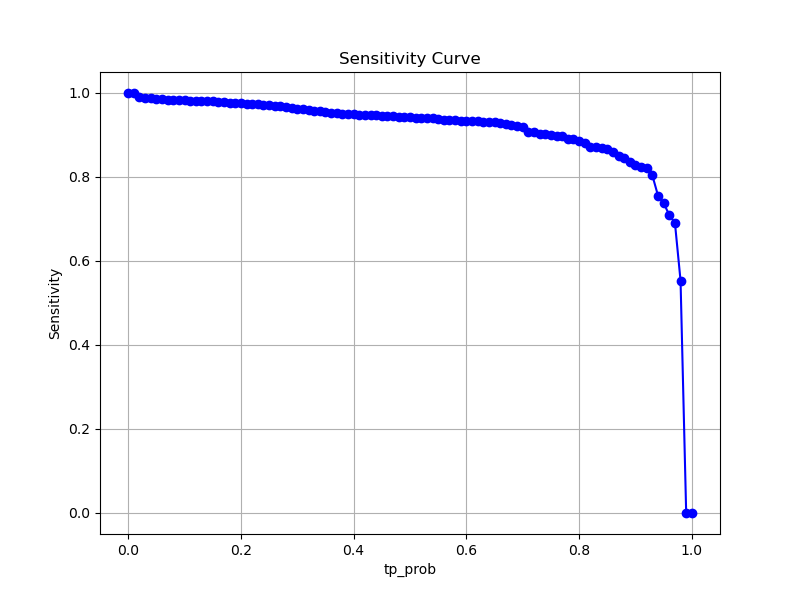

#### Version 2

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_2/b2ea7d39-ca72-4b60-891a-1a6055560759/call-plot_sensitivity_indels/sensitivity_plot_indel.png...
/ [1/1 files][ 22.6 KiB/ 22.6 KiB] 100% Done                                    
Operation completed over 1 objects/22.6 KiB.                                     


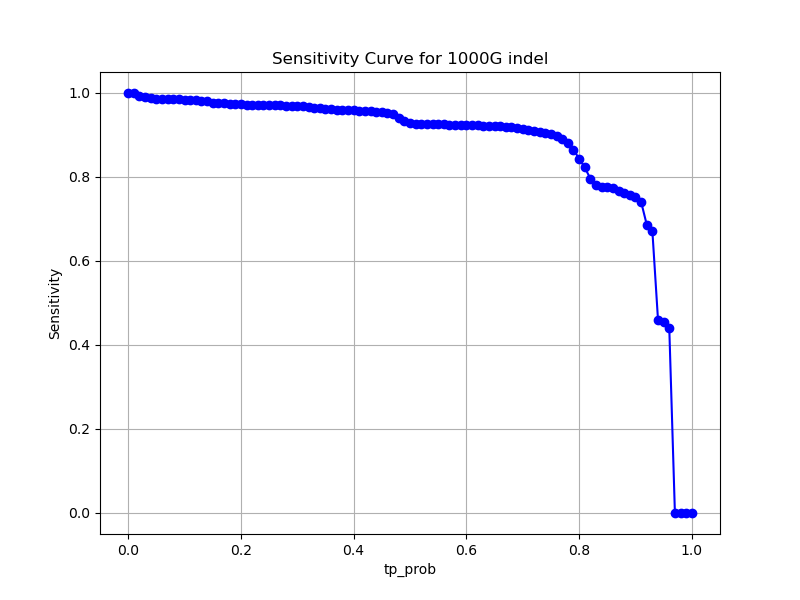

#### Version 3

In [17]:
!gsutil -m -q cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_6_VARIANT_SENSITIVITY/9903cbba-8cb3-4616-8bf1-1a10fdacdb43/call-plot_sensitivity_indels/sensitivity_plot_indel.png sensitivity_plot_indels.v3.png

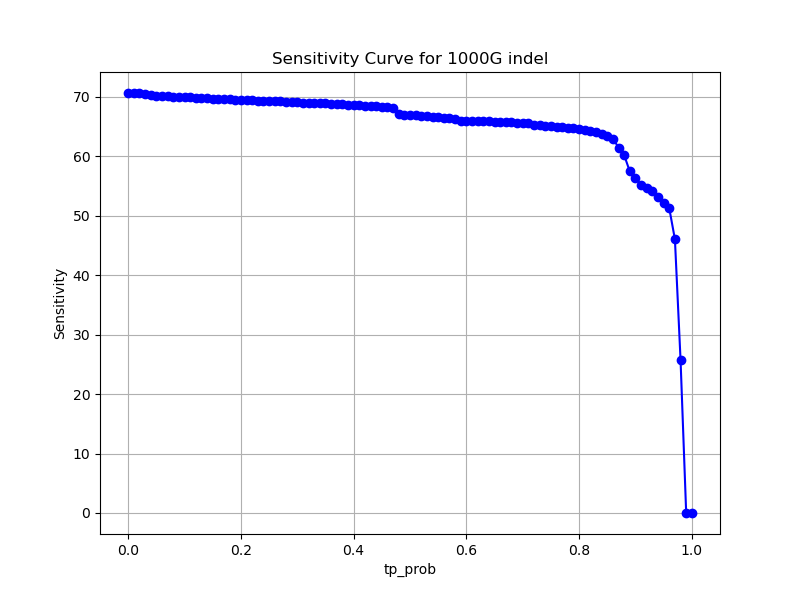

In [18]:
from IPython.display import Image

# Path to your PNG file
Image(filename='sensitivity_plot_indels.v3.png')

In [5]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_6_Variant_Sensitivity/0321c1d1-cddc-49db-96b5-ed1fe164b3cd/call-plot_sensitivity_indels/cacheCopy/sensitivity_plot_indel.png test.png

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_6_Variant_Sensitivity/0321c1d1-cddc-49db-96b5-ed1fe164b3cd/call-plot_sensitivity_indels/cacheCopy/sensitivity_plot_indel.png...
/ [1/1 files][ 23.6 KiB/ 23.6 KiB] 100% Done                                    
Operation completed over 1 objects/23.6 KiB.                                     


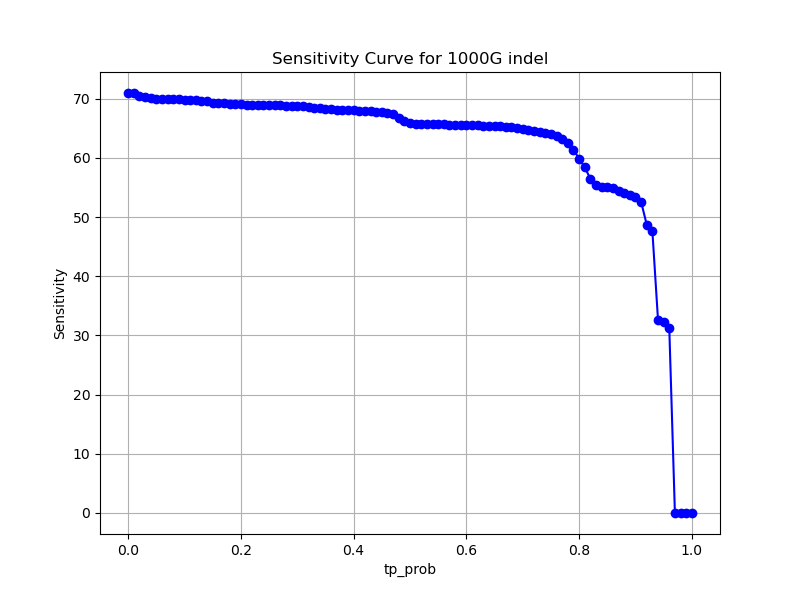

In [6]:
from IPython.display import Image

# Path to your PNG file
Image(filename='test.png')

## HWE vs TP

In [5]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/2292ab3f-3d93-4790-a51d-0a47a9b9dac3/call-PlotHWEvsTPProb_snps/p_hwe_vs_tp_prob_plot.png hwe_plot_snps.png
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/2292ab3f-3d93-4790-a51d-0a47a9b9dac3/call-PlotHWEvsTPProb_indels/p_hwe_vs_tp_prob_plot.png hwe_plot_indels.png

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/2292ab3f-3d93-4790-a51d-0a47a9b9dac3/call-PlotHWEvsTPProb_snps/p_hwe_vs_tp_prob_plot.png...
/ [1/1 files][ 32.5 KiB/ 32.5 KiB] 100% Done                                    
Operation completed over 1 objects/32.5 KiB.                                     
Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/2292ab3f-3d93-4790-a51d-0a47a9b9dac3/call-PlotHWEvsTPProb_indels/p_hwe_vs_tp_prob_plot.png...
/ [1/1 files][ 31.1 KiB/ 31.1 KiB] 100% Done                                    
Operation completed over 1 objects/31.1 KiB.                                     


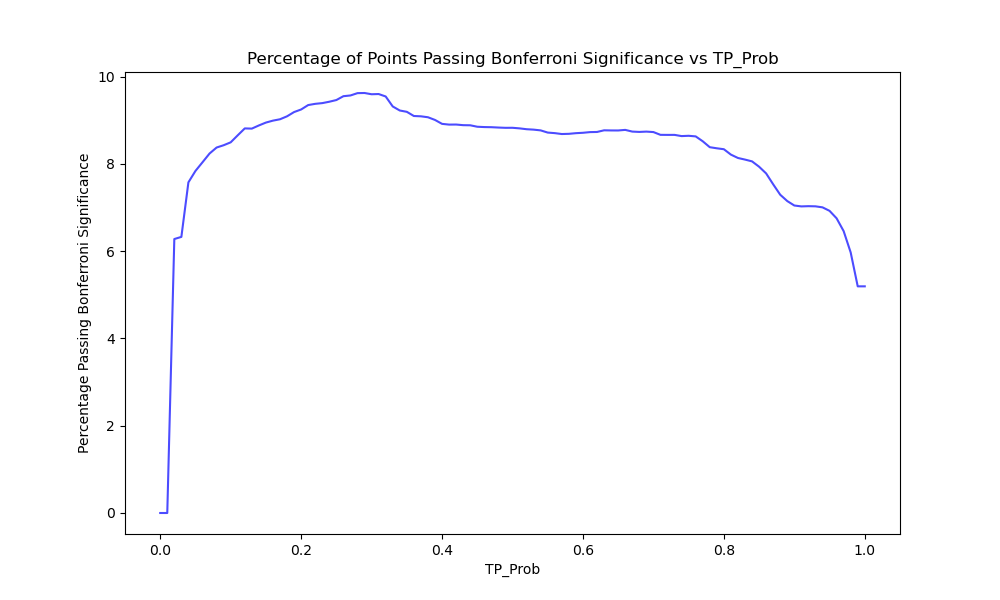

In [6]:
from IPython.display import Image

# Path to your PNG file
Image(filename='hwe_plot_snps.png')

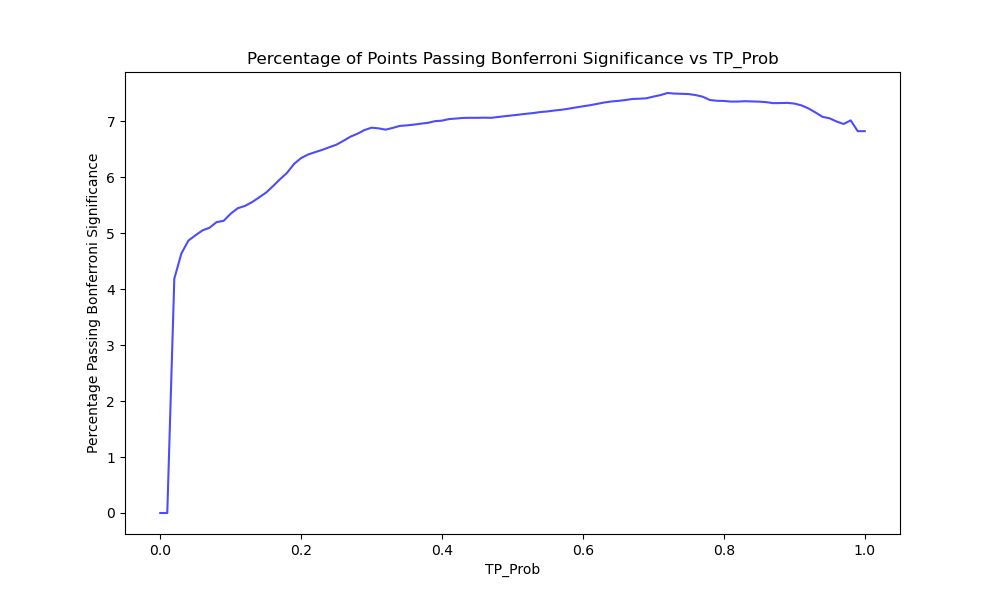

In [7]:
from IPython.display import Image

# Path to your PNG file
Image(filename='hwe_plot_indels.png')

# HWE Testing

## SNPs

### Version 1

In [27]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/7c215834-6aa9-4d88-9b8a-d1c80504f6a8/call-PlotHWEvsTPProb_snps/p_hwe_vs_tp_prob_plot.png p_hwe_vs_tp_prob_plot_snps.v1.png

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/7c215834-6aa9-4d88-9b8a-d1c80504f6a8/call-PlotHWEvsTPProb_snps/p_hwe_vs_tp_prob_plot.png...
/ [1/1 files][ 80.9 KiB/ 80.9 KiB] 100% Done                                    
Operation completed over 1 objects/80.9 KiB.                                     


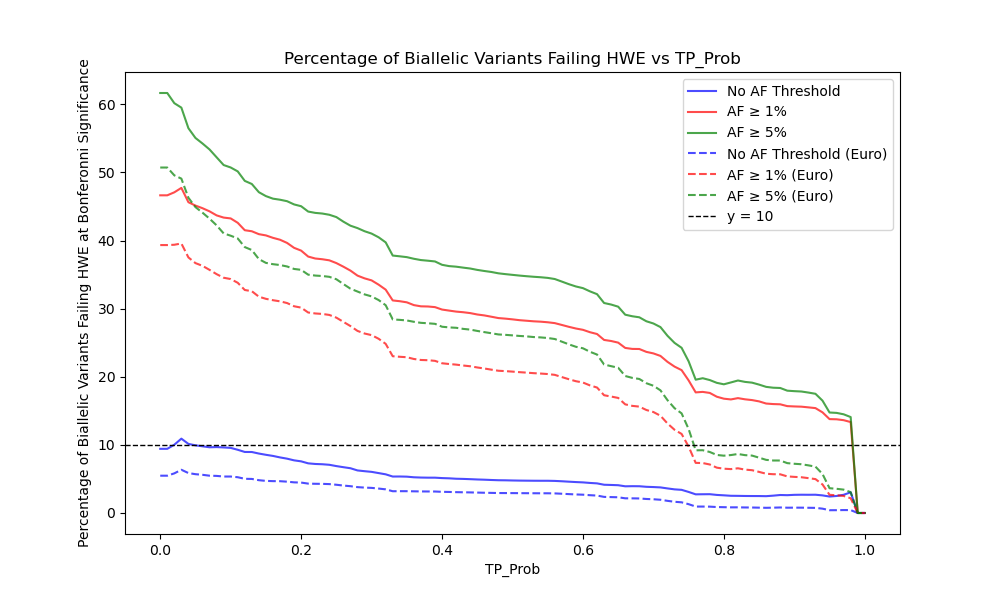

In [28]:
from IPython.display import Image

# Path to your PNG file
Image(filename='p_hwe_vs_tp_prob_plot_snps.v1.png')

### Version 2

In [25]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/3ac28007-f29e-4da1-8a6a-d2d390537757/call-PlotHWEvsTPProb_snps/p_hwe_vs_tp_prob_plot_snp.png p_hwe_vs_tp_prob_plot_snps.v2.png

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/3ac28007-f29e-4da1-8a6a-d2d390537757/call-PlotHWEvsTPProb_snps/p_hwe_vs_tp_prob_plot_snp.png...
/ [1/1 files][ 78.0 KiB/ 78.0 KiB] 100% Done                                    
Operation completed over 1 objects/78.0 KiB.                                     


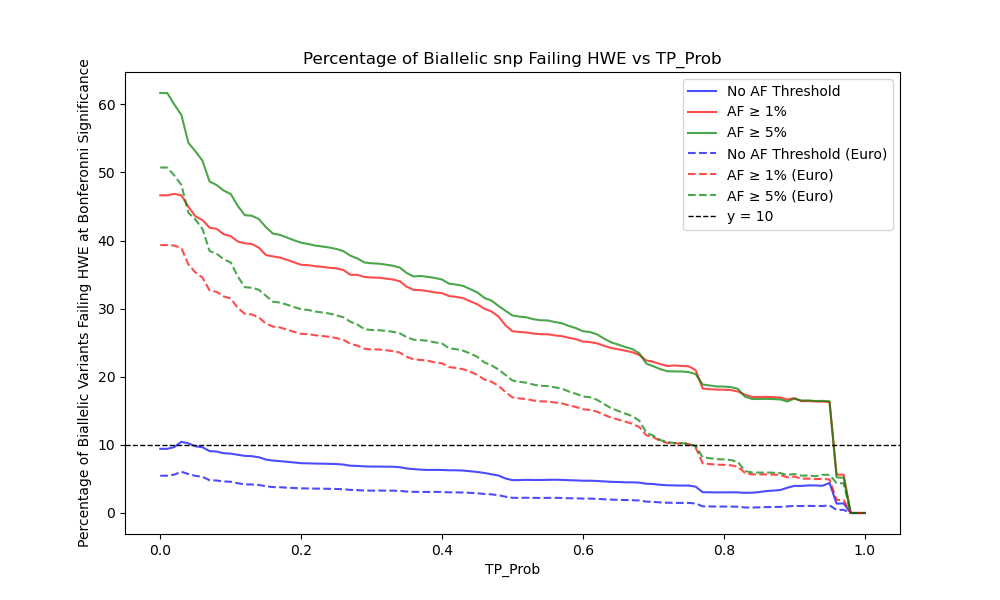

In [26]:
from IPython.display import Image

# Path to your PNG file
Image(filename='p_hwe_vs_tp_prob_plot_snps.v2.png')

In [3]:
!gsutil -m -q cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/STEP_7_VARIANT_HWE/37b62ec0-6f4b-4f37-80f6-2025fa7a2cf7/call-PlotHWEvsTPProb_snps/p_hwe_vs_tp_prob_plot_snp.png p_hwe_vs_tp_prob_plot_snps.v3.png 

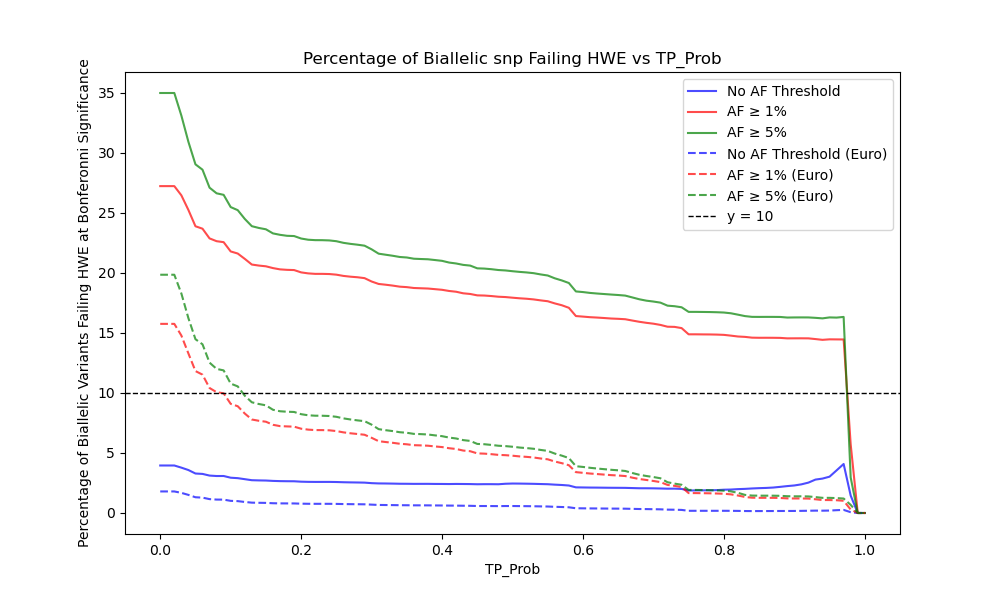

In [4]:
from IPython.display import Image

# Path to your PNG file
Image(filename='p_hwe_vs_tp_prob_plot_snps.v3.png')

### Indels

#### Version 1

In [31]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/7c215834-6aa9-4d88-9b8a-d1c80504f6a8/call-PlotHWEvsTPProb_indels/p_hwe_vs_tp_prob_plot.png p_hwe_vs_tp_prob_plot_indels.v1.png

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/7c215834-6aa9-4d88-9b8a-d1c80504f6a8/call-PlotHWEvsTPProb_indels/p_hwe_vs_tp_prob_plot.png...
/ [1/1 files][ 79.8 KiB/ 79.8 KiB] 100% Done                                    
Operation completed over 1 objects/79.8 KiB.                                     


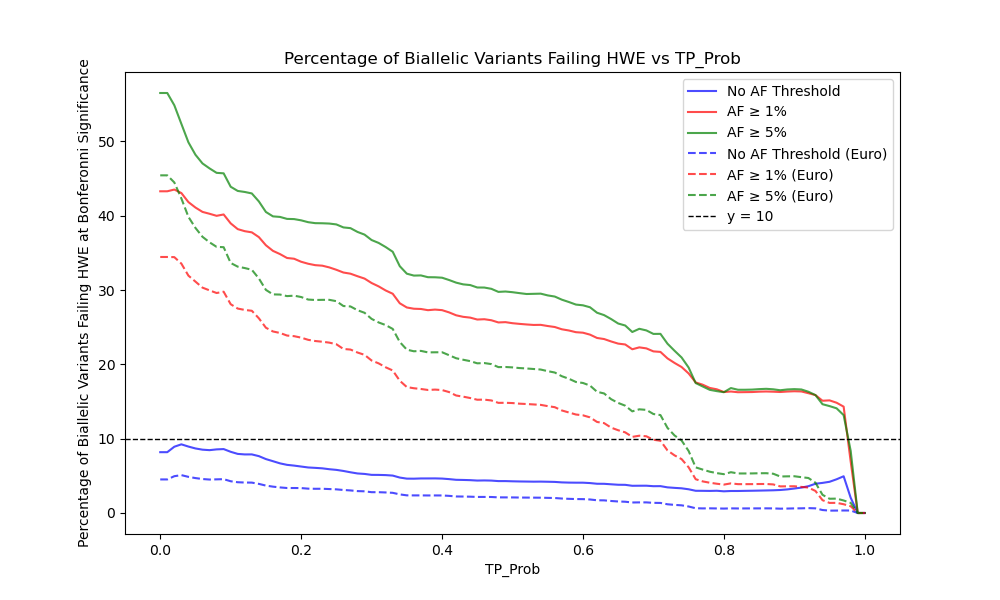

In [32]:
from IPython.display import Image

# Path to your PNG file
Image(filename='p_hwe_vs_tp_prob_plot_indels.v1.png')

#### Version 2

In [33]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/3ac28007-f29e-4da1-8a6a-d2d390537757/call-PlotHWEvsTPProb_indels/p_hwe_vs_tp_prob_plot_indel.png p_hwe_vs_tp_prob_plot_indels.v2.png

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/3ac28007-f29e-4da1-8a6a-d2d390537757/call-PlotHWEvsTPProb_indels/p_hwe_vs_tp_prob_plot_indel.png...
/ [1/1 files][ 78.4 KiB/ 78.4 KiB] 100% Done                                    
Operation completed over 1 objects/78.4 KiB.                                     


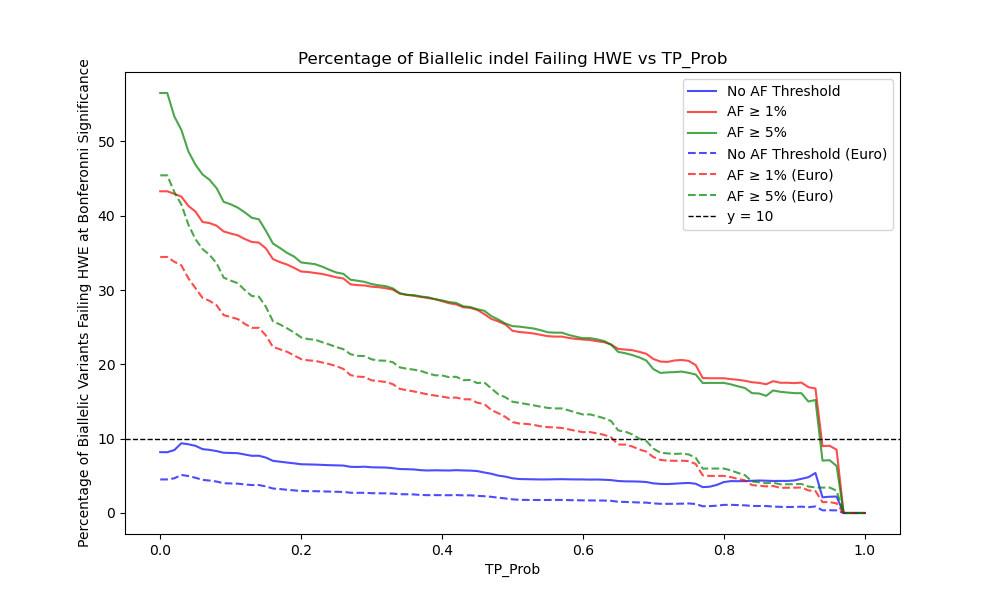

In [34]:
from IPython.display import Image

# Path to your PNG file
Image(filename='p_hwe_vs_tp_prob_plot_indels.v2.png')

# Calculating Optimal TP_Prob Value

## SNPs

In [1]:
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/3ac28007-f29e-4da1-8a6a-d2d390537757/call-PlotHWEvsTPProb_snps/tp_prob_hwe_output_snp.tsv hwe_snps.tsv
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_2/b2ea7d39-ca72-4b60-891a-1a6055560759/call-plot_sensitivity_snps/sensitivity_output_snp.tsv sensitivity_snps.tsv
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/2fabefbf-4aec-4df1-8f19-8b54426d5f15/call-GraphTotalSnps/tp_prob_vs_median_SNPs.tsv total_snps.tsv
!gsutil -m cp gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/2fabefbf-4aec-4df1-8f19-8b54426d5f15/call-GraphDeNovoSnps/tp_prob_vs_median_DeNovo_SNPs.tsv denovo_snps.tsv

Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_3/3ac28007-f29e-4da1-8a6a-d2d390537757/call-PlotHWEvsTPProb_snps/tp_prob_hwe_output_snp.tsv...
/ [1/1 files][ 11.4 KiB/ 11.4 KiB] 100% Done                                    
Operation completed over 1 objects/11.4 KiB.                                     
Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF_2/b2ea7d39-ca72-4b60-891a-1a6055560759/call-plot_sensitivity_snps/sensitivity_output_snp.tsv...
/ [1/1 files][  2.4 KiB/  2.4 KiB] 100% Done                                    
Operation completed over 1 objects/2.4 KiB.                                      
Copying gs://fc-secure-d531c052-7b41-4dea-9e1d-22e648f6e228/cromwell-execution/Assess_RF/2fabefbf-4aec-4df1-8f19-8b54426d5f15/call-GraphTotalSnps/tp_prob_vs_median_SNPs.tsv...
/ [1/1 files][  3.0 KiB/  3.0 KiB] 100% Done                                    
Operation completed over 1 objects/3.0 KiB.     

In [16]:
import pandas as pd
import numpy as np

# Load the data from the TSV files
hwe_df = pd.read_csv('hwe_indels.tsv', sep='\t')
sensitivity_df = pd.read_csv('sensitivity_indels.tsv', sep='\t')
denovo_df = pd.read_csv('denovo_indels.tsv', sep='\t')
total_df = pd.read_csv('total_indels.tsv', sep='\t')

# Merge all dataframes on 'tp_prob'
merged_df = pd.merge(hwe_df, sensitivity_df, on='tp_prob')
merged_df = pd.merge(merged_df, denovo_df, on='tp_prob')
merged_df = pd.merge(merged_df, total_df, on='tp_prob')

# Normalize the 'total_snps' column by dividing by the max value
merged_df['median_Indels_norm'] = merged_df['median_Indels_variants'] / merged_df['median_Indels_variants'].max()
merged_df['median_DeNovo_Indels_norm'] = merged_df['median_DeNovo_Indels_variants'] / merged_df['median_DeNovo_Indels_variants'].max()
merged_df['median_p_hwe_1_percent_euro_norm'] = merged_df['median_p_hwe_1_percent_euro'] / merged_df['median_p_hwe_1_percent_euro'].max()

# Define columns to optimize
max_cols = ['median_Indels_norm', 'sensitivity']  # Columns to maximize
min_cols = ['median_DeNovo_Indels_variants', 'median_p_hwe_1_percent_euro']  # Columns to minimize

#merged_df.head()
pd.set_option('display.max_rows', None)
# Calculate the Euclidean distance for each row
merged_df['euclidean_distance'] = np.sqrt(
    (1-merged_df['median_Indels_norm']) ** 2 + (1- merged_df['sensitivity']) ** 2 + (merged_df['median_DeNovo_Indels_norm']) ** 2 + (merged_df['median_p_hwe_1_percent_euro_norm']) ** 2
)
merged_df['euclidean_distance_sensitivity'] = np.sqrt(
    (1- merged_df['sensitivity']) ** 2 + (1-merged_df['median_Indels_norm']) ** 2
)
merged_df['euclidean_distance_specificity'] = np.sqrt(
    (merged_df['median_DeNovo_Indels_norm']) ** 2 + (merged_df['median_p_hwe_1_percent_euro_norm']) ** 2
)
merged_df

,tp_prob,median_p_hwe,median_p_hwe_1_percent,median_p_hwe_5_percent,median_p_hwe_euro,median_p_hwe_1_percent_euro,median_p_hwe_5_percent_euro,sensitivity,median_DeNovo_Indels_variants,Lower_IQR_DeNovo_Indels_variants,Upper_IQR_DeNovo_Indels_variants,median_Indels_variants,Lower_IQR_Indels_variants,Upper_IQR_Indels_variants,median_Indels_norm,median_DeNovo_Indels_norm,median_p_hwe_1_percent_euro_norm,euclidean_distance,euclidean_distance_sensitivity,euclidean_distance_specificity
0,0.00,8.183550,43.287868,56.512605,4.516017,34.447950,45.432692,1.000000,572.0,537.5,631.5,15441.0,15147.00,15806.75,1.000000,1.000000,1.000000,1.414214,0.000000,1.414214
1,0.01,8.183550,43.287868,56.512605,4.516017,34.447950,45.432692,1.000000,572.0,537.5,631.5,15441.0,15147.00,15806.75,1.000000,1.000000,1.000000,1.414214,0.000000,1.414214
2,0.02,8.466239,42.942708,53.360397,4.669306,33.806147,43.174924,0.993287,472.0,442.0,524.5,15005.0,14713.50,15316.25,0.971763,0.825175,0.981369,1.282513,0.029024,1.282185
3,0.03,9.385574,42.564802,51.547842,5.124666,33.321505,41.505489,0.989591,347.0,323.0,376.0,14301.0,14043.75,14554.75,0.926171,0.606643,0.967300,1.144222,0.074560,1.141791
4,0.04,9.244338,41.315246,48.643216,4.972586,31.572948,38.802661,0.987932,324.0,301.5,353.0,14157.5,13896.75,14400.25,0.916877,0.566434,0.916541,1.080717,0.083994,1.077448
5,0.05,9.040162,40.563119,46.866772,4.742380,30.258449,36.845135,0.986725,309.0,285.5,339.0,14044.5,13789.25,14287.25,0.909559,0.540210,0.878382,1.035247,0.091410,1.031204
6,0.06,8.595083,39.162404,45.553145,4.455595,28.951679,35.523979,0.986122,301.0,274.0,330.5,13952.0,13688.25,14189.75,0.903568,0.526224,0.840447,0.996371,0.097425,0.991596
7,0.07,8.491285,39.009186,44.831399,4.365059,28.541492,34.735577,0.985594,291.0,268.5,324.5,13857.5,13606.50,14098.25,0.897448,0.508741,0.828540,0.977763,0.103559,0.972263
8,0.08,8.329897,38.657172,43.710871,4.231959,27.948164,33.600000,0.985141,284.0,262.0,318.5,13784.0,13525.50,14017.75,0.892688,0.496503,0.811316,0.957333,0.108336,0.951183
9,0.09,8.106977,37.884683,41.870161,3.998535,26.630679,31.669866,0.984613,277.0,256.0,310.0,13707.5,13452.50,13938.50,0.887734,0.484266,0.773070,0.919234,0.113316,0.912223


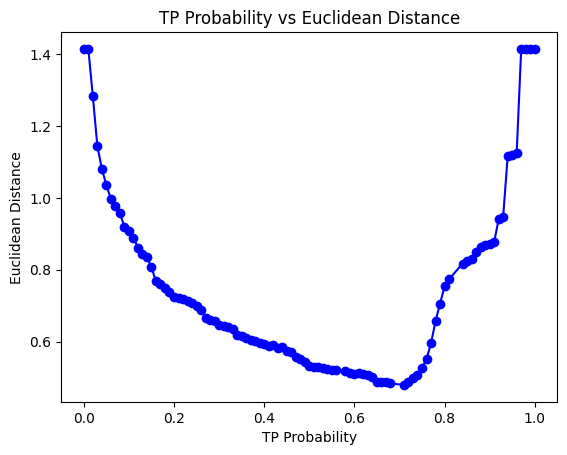

In [17]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has columns 'tp_prob' and 'euclidean_distance'
plt.plot(merged_df['tp_prob'], merged_df['euclidean_distance'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('TP Probability')
plt.ylabel('Euclidean Distance')
plt.title('TP Probability vs Euclidean Distance')

# Show plot
plt.show()